## 1.Dataset Features

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import pandas as pd
import numpy as np
import os 
import time
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from datetime import datetime

In [5]:
start = time.time()

crypto_df = pd.read_csv("/content/drive/MyDrive/Projects/BDA/input/train.csv")

end = time.time()
print(end - start)

70.26465487480164


In [6]:
crypto_df.shape

(24236806, 10)

In [7]:
crypto_df.head(10)

timestamp  Asset_ID  Count          Open        High         Low  \
0  1514764860         2   40.0   2376.580000   2399.5000   2357.1400   
1  1514764860         0    5.0      8.530000      8.5300      8.5300   
2  1514764860         1  229.0  13835.194000  14013.8000  13666.1100   
3  1514764860         5   32.0      7.659600      7.6596      7.6567   
4  1514764860         7    5.0     25.920000     25.9200     25.8740   
5  1514764860         6  173.0    738.302500    746.0000    732.5100   
6  1514764860         9  167.0    225.330000    227.7800    222.9800   
7  1514764860        11    7.0    329.090000    329.8800    329.0900   
8  1514764920         2   53.0   2374.553333   2400.9000   2354.2000   
9  1514764920         0    7.0      8.530000      8.5300      8.5145   

          Close       Volume          VWAP    Target  
0   2374.590000    19.233005   2373.116392 -0.004218  
1      8.530000    78.380000      8.530000 -0.014399  
2  13850.176000    31.550062  13827.062093 -0.014643  
3      7.657600  6626.713370      7.657713 -0.013922  
4     25.877000   121.087310     25.891363 -0.008264  
5    738.507500   335.987856    738.839291 -0.004809  
6    225.206667   411.896642    225.197944 -0.009791  
7    329.460000     6.635710    329.454118       NaN  
8   2372.286667    24.050259   2371.434498 -0.004079  
9      8.514500    71.390000      8.520215 -0.015875

In [8]:
start = crypto_df.iloc[0].timestamp.astype('datetime64[s]')
end = crypto_df.iloc[-1].timestamp.astype('datetime64[s]')

print(f'Data from {start} until {end}')

Data from 2018-01-01T00:01:00 until 2021-09-21T00:00:00


In [10]:
asset_details_df = pd.read_csv("/content/drive/MyDrive/Projects/BDA/input/asset_details.csv")

In [11]:
asset_details_df

Asset_ID    Weight        Asset_Name
0          2  2.397895      Bitcoin Cash
1          0  4.304065      Binance Coin
2          1  6.779922           Bitcoin
3          5  1.386294            EOS.IO
4          7  2.079442  Ethereum Classic
5          6  5.894403          Ethereum
6          9  2.397895          Litecoin
7         11  1.609438            Monero
8         13  1.791759              TRON
9         12  2.079442           Stellar
10         3  4.406719           Cardano
11         8  1.098612              IOTA
12        10  1.098612             Maker
13         4  3.555348          Dogecoin

## 2.Trading Data visualization 

In [12]:
btc_mini_df = crypto_df[crypto_df.Asset_ID == 1].iloc[-60:]

In [13]:
btc_mini_df.head(10)

timestamp  Asset_ID   Count          Open      High       Low  \
24235969  1632178860         1  1952.0  43353.120000  43376.00  43283.10   
24235983  1632178920         1  4369.0  43365.748750  43546.61  43335.64   
24235997  1632178980         1  4638.0  43477.087500  43640.00  43441.56   
24236011  1632179040         1  3211.0  43588.102500  43627.00  43428.80   
24236025  1632179100         1  5038.0  43447.602857  43455.00  43172.90   
24236039  1632179160         1  4671.0  43205.556250  43276.57  43133.08   
24236053  1632179220         1  2791.0  43234.952857  43366.00  43209.90   
24236067  1632179280         1  1844.0  43267.830000  43288.47  43218.81   
24236081  1632179340         1  3832.0  43229.501250  43287.50  43062.90   
24236095  1632179400         1  3207.0  43106.669255  43133.15  43050.90   

                 Close      Volume          VWAP    Target  
24235969  43344.558571   65.051627  43329.733310 -0.000184  
24235983  43484.613750  145.414597  43446.758145  0.000255  
24235997  43580.823750  180.392877  43544.364733  0.001151  
24236011  43470.795000  149.275363  43535.659814  0.002428  
24236025  43198.788571  138.454840  43344.478199  0.001363  
24236039  43213.690000  199.959730  43209.370264  0.000565  
24236053  43269.547143  101.917324  43295.323457 -0.000912  
24236067  43239.261250   66.517441  43253.365759 -0.000915  
24236081  43114.236141  100.369113  43188.795414 -0.002730  
24236095  43067.630000  122.076485  43083.913981 -0.002652

In [14]:
btc_mini_df = btc_mini_df.set_index("timestamp")

In [15]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=btc_mini_df.index, 
                                     open=btc_mini_df['Open'], 
                                     high=btc_mini_df['High'], 
                                     low=btc_mini_df['Low'], 
                                     close=btc_mini_df['Close'])])
fig.show()

## 3.Data Preprocessing

In [16]:
btc_df = crypto_df[crypto_df.Asset_ID == 1].set_index('timestamp')

btc_df.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956282 entries, 1514764860 to 1632182400
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Asset_ID  1956282 non-null  int64  
 1   Count     1956282 non-null  float64
 2   Open      1956282 non-null  float64
 3   High      1956282 non-null  float64
 4   Low       1956282 non-null  float64
 5   Close     1956282 non-null  float64
 6   Volume    1956282 non-null  float64
 7   VWAP      1956282 non-null  float64
 8   Target    1955978 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 149.3 MB


In [17]:
btc_df.isna().sum()

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target      304
dtype: int64

In [18]:
# look at the time lag between consecutive entries in dataset which should be 60 seconds

(btc_df.index[1:]-btc_df.index[:-1]).value_counts().head()

60     1956136
120         78
180         12
240         11
420          9
Name: timestamp, dtype: int64

In [19]:
btc_df.isnull().sum()

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target      304
dtype: int64

In [20]:
# to fill the gaps more than 60 seconds, fill in the missing data with the value from the most recent available minute

btc_df = btc_df.reindex(range(btc_df.index[0],btc_df.index[-1]+60,60), method='pad')

In [21]:
(btc_df.index[1:]-btc_df.index[:-1]).value_counts().head()

# now all the data has gap of 60 seconds (1 min)

60    1956959
Name: timestamp, dtype: int64

In [22]:
btc_df['datetime'] = btc_df.apply(lambda r: np.float64(r.name).astype('datetime64[s]'), axis=1)

btc_df.set_index('datetime', inplace=True);

btc_df.head(10)

Asset_ID  Count       Open     High       Low      Close  \
datetime                                                                        
2018-01-01 00:01:00         1  229.0  13835.194  14013.8  13666.11  13850.176   
2018-01-01 00:02:00         1  235.0  13835.036  14052.3  13680.00  13828.102   
2018-01-01 00:03:00         1  528.0  13823.900  14000.4  13601.00  13801.314   
2018-01-01 00:04:00         1  435.0  13802.512  13999.0  13576.28  13768.040   
2018-01-01 00:05:00         1  742.0  13766.000  13955.9  13554.44  13724.914   
2018-01-01 00:06:00         1  554.0  13717.714  14000.7  13520.00  13717.112   
2018-01-01 00:07:00         1  546.0  13720.922  14001.4  13501.01  13670.940   
2018-01-01 00:08:00         1  437.0  13669.246  13914.6  13504.99  13721.348   
2018-01-01 00:09:00         1  288.0  13713.412  13948.9  13539.99  13720.260   
2018-01-01 00:10:00         1  270.0  13713.610  13948.5  13530.00  13719.902   

                         Volume          VWAP    Target  
datetime                                                 
2018-01-01 00:01:00   31.550062  13827.062093 -0.014643  
2018-01-01 00:02:00   31.046432  13840.362591 -0.015037  
2018-01-01 00:03:00   55.061820  13806.068014 -0.010309  
2018-01-01 00:04:00   38.780529  13783.598101 -0.008999  
2018-01-01 00:05:00  108.501637  13735.586842 -0.008079  
2018-01-01 00:06:00   70.805776  13706.952030 -0.004422  
2018-01-01 00:07:00   70.762103  13683.843336 -0.008873  
2018-01-01 00:08:00   78.298555  13701.600413 -0.008492  
2018-01-01 00:09:00   60.100796  13720.524584 -0.006282  
2018-01-01 00:10:00   56.578007  13711.904983 -0.003889

## 4.Feature Engineering

In [23]:
btc_df.head(5)

Asset_ID  Count       Open     High       Low      Close  \
datetime                                                                        
2018-01-01 00:01:00         1  229.0  13835.194  14013.8  13666.11  13850.176   
2018-01-01 00:02:00         1  235.0  13835.036  14052.3  13680.00  13828.102   
2018-01-01 00:03:00         1  528.0  13823.900  14000.4  13601.00  13801.314   
2018-01-01 00:04:00         1  435.0  13802.512  13999.0  13576.28  13768.040   
2018-01-01 00:05:00         1  742.0  13766.000  13955.9  13554.44  13724.914   

                         Volume          VWAP    Target  
datetime                                                 
2018-01-01 00:01:00   31.550062  13827.062093 -0.014643  
2018-01-01 00:02:00   31.046432  13840.362591 -0.015037  
2018-01-01 00:03:00   55.061820  13806.068014 -0.010309  
2018-01-01 00:04:00   38.780529  13783.598101 -0.008999  
2018-01-01 00:05:00  108.501637  13735.586842 -0.008079

### Creating dataset for supervised learning

##### Transform the timestamp into day, hour, min, thus creating three new features

In [24]:
btc_mini_df = btc_df[-7201:].copy(deep=True) 

In [25]:
btc_mini_df.head(5)

Asset_ID   Count          Open      High       Low  \
datetime                                                                  
2021-09-16 00:00:00         1  2466.0  48142.545443  48188.12  48086.22   
2021-09-16 00:01:00         1  1757.0  48101.928395  48164.10  48080.00   
2021-09-16 00:02:00         1  2331.0  48135.697143  48211.23  48069.62   
2021-09-16 00:03:00         1  2231.0  48185.676423  48222.63  48119.94   
2021-09-16 00:04:00         1  2241.0  48164.208136  48182.36  48067.83   

                            Close      Volume          VWAP    Target  
datetime                                                               
2021-09-16 00:00:00  48101.315714  100.182817  48132.845372  0.001079  
2021-09-16 00:01:00  48135.600000   64.948787  48112.135086  0.001212  
2021-09-16 00:02:00  48186.595714  101.655798  48125.096256  0.001464  
2021-09-16 00:03:00  48163.827500   53.992481  48174.667732  0.001517  
2021-09-16 00:04:00  48106.416629   65.479223  48122.721662  0.001424

In [26]:
btc_mini_df['time'] = btc_mini_df.apply(lambda r:r.name, axis=1)

# parse timestamp into year, month, day and hour
btc_mini_df['year'] = [btc_mini_df.iloc[i].time.year for i in range(len(btc_mini_df))]  
btc_mini_df['month'] = [btc_mini_df.iloc[i].time.month for i in range(len(btc_mini_df))]
btc_mini_df['day'] = [btc_mini_df.iloc[i].time.day for i in range(len(btc_mini_df))]
btc_mini_df['hour'] = [btc_mini_df.iloc[i].time.hour for i in range(len(btc_mini_df))]

In [27]:
btc_mini_df.head(5)

Asset_ID   Count          Open      High       Low  \
datetime                                                                  
2021-09-16 00:00:00         1  2466.0  48142.545443  48188.12  48086.22   
2021-09-16 00:01:00         1  1757.0  48101.928395  48164.10  48080.00   
2021-09-16 00:02:00         1  2331.0  48135.697143  48211.23  48069.62   
2021-09-16 00:03:00         1  2231.0  48185.676423  48222.63  48119.94   
2021-09-16 00:04:00         1  2241.0  48164.208136  48182.36  48067.83   

                            Close      Volume          VWAP    Target  \
datetime                                                                
2021-09-16 00:00:00  48101.315714  100.182817  48132.845372  0.001079   
2021-09-16 00:01:00  48135.600000   64.948787  48112.135086  0.001212   
2021-09-16 00:02:00  48186.595714  101.655798  48125.096256  0.001464   
2021-09-16 00:03:00  48163.827500   53.992481  48174.667732  0.001517   
2021-09-16 00:04:00  48106.416629   65.479223  48122.721662  0.001424   

                                   time  year  month  day  hour  
datetime                                                         
2021-09-16 00:00:00 2021-09-16 00:00:00  2021      9   16     0  
2021-09-16 00:01:00 2021-09-16 00:01:00  2021      9   16     0  
2021-09-16 00:02:00 2021-09-16 00:02:00  2021      9   16     0  
2021-09-16 00:03:00 2021-09-16 00:03:00  2021      9   16     0  
2021-09-16 00:04:00 2021-09-16 00:04:00  2021      9   16     0

In [28]:
# average data per hour 
tmp = btc_mini_df.groupby(['year', 'month', 'day', 'hour']).mean()

# restore the multilevel index created by groupby into the year, month, day, hour columns that we created earlier
tmp.reset_index(inplace=True)

<ipython-input-28-5d5d80ac23c9>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [29]:
cols = ['year', 'month', 'day', 'hour', 'Close']

tmp[cols].head(5)

year  month  day  hour         Close
0  2021      9   16     0  48011.855849
1  2021      9   16     1  47989.773176
2  2021      9   16     2  47961.590146
3  2021      9   16     3  47622.839055
4  2021      9   16     4  48175.404142

###### The idea is to predict the value at the current timestamp based on the value from the previous timestamp(s).

In [30]:
# We use pandas' dataframe.shift() function, which shifts values vertically or horizontally, fills in with NaN values and leaves the index as it is

tmp = btc_mini_df['Close'] # extract only the Close price

lag_df = pd.concat([tmp.shift(1, axis = 0), tmp], axis=1) # downward shift by 1 step 

# the original price series becomes the time t value, 
# while the downward shifted series is time t+1
lag_df.columns = ['Close(t)', 'Close(t+1)'] 

lag_df.head()

Close(t)    Close(t+1)
datetime                                       
2021-09-16 00:00:00           NaN  48101.315714
2021-09-16 00:01:00  48101.315714  48135.600000
2021-09-16 00:02:00  48135.600000  48186.595714
2021-09-16 00:03:00  48186.595714  48163.827500
2021-09-16 00:04:00  48163.827500  48106.416629

In [31]:
# Now taking 3 previous time values for time t

lag_df = pd.concat([tmp.shift(3), tmp.shift(2), tmp.shift(1), tmp], axis=1)

lag_df.columns = ['Close(t-2)', 'Close(t-1)', 'Close(t)', 'Close(t+1)'] # rename columns for easier read

lag_df.head()

Close(t-2)    Close(t-1)      Close(t)    Close(t+1)
datetime                                                                   
2021-09-16 00:00:00           NaN           NaN           NaN  48101.315714
2021-09-16 00:01:00           NaN           NaN  48101.315714  48135.600000
2021-09-16 00:02:00           NaN  48101.315714  48135.600000  48186.595714
2021-09-16 00:03:00  48101.315714  48135.600000  48186.595714  48163.827500
2021-09-16 00:04:00  48135.600000  48186.595714  48163.827500  48106.416629

In [32]:
# Now we compute summary statistics of these values and use them as features for prediction
# The most common aggregate value is the mean of the lag window (also called moving average or rolling mean)


tmp = btc_mini_df['Close'] # extract only the Close price

lag_df = tmp.shift(1) # downward shift by 1

window = lag_df.rolling(window=2) # rolling window size of 2
means = window.mean() # compute the means for the rolling windows

new_df = pd.concat([means, tmp], axis=1) # concatenate the two series vertically

new_df.columns = ['mean(t-1,t)', 't+1'] # rename columns for easier reading

new_df.head()

mean(t-1,t)           t+1
datetime                                       
2021-09-16 00:00:00           NaN  48101.315714
2021-09-16 00:01:00           NaN  48135.600000
2021-09-16 00:02:00  48118.457857  48186.595714
2021-09-16 00:03:00  48161.097857  48163.827500
2021-09-16 00:04:00  48175.211607  48106.416629

In [33]:
window = tmp.expanding()

dataframe = pd.concat([window.min(), window.mean(), window.max(), tmp.shift(-1)], axis=1)

dataframe.columns = ['min', 'mean', 'max', 't+1']

print(dataframe.head(5))

                              min          mean           max           t+1
datetime                                                                   
2021-09-16 00:00:00  48101.315714  48101.315714  48101.315714  48135.600000
2021-09-16 00:01:00  48101.315714  48118.457857  48135.600000  48186.595714
2021-09-16 00:02:00  48101.315714  48141.170476  48186.595714  48163.827500
2021-09-16 00:03:00  48101.315714  48146.834732  48186.595714  48106.416629
2021-09-16 00:04:00  48101.315714  48138.751112  48186.595714  48075.588750


In [34]:


# printing initial dataset to verify that tha dataframe above is correct
tmp.head(5)

datetime
2021-09-16 00:00:00    48101.315714
2021-09-16 00:01:00    48135.600000
2021-09-16 00:02:00    48186.595714
2021-09-16 00:03:00    48163.827500
2021-09-16 00:04:00    48106.416629
Name: Close, dtype: float64

   A typical feature for assets price time series is the ratio between the current price and the price at the previous time point. This is usually computed as a log of the ratio in time series modelling, because that facilitates some apperations (additions, etc). In this case, they are called log returns

In [35]:
# helper function to compute the log returns
def log_returns(series, periods = 1):
    return np.log(series).diff(periods = periods)

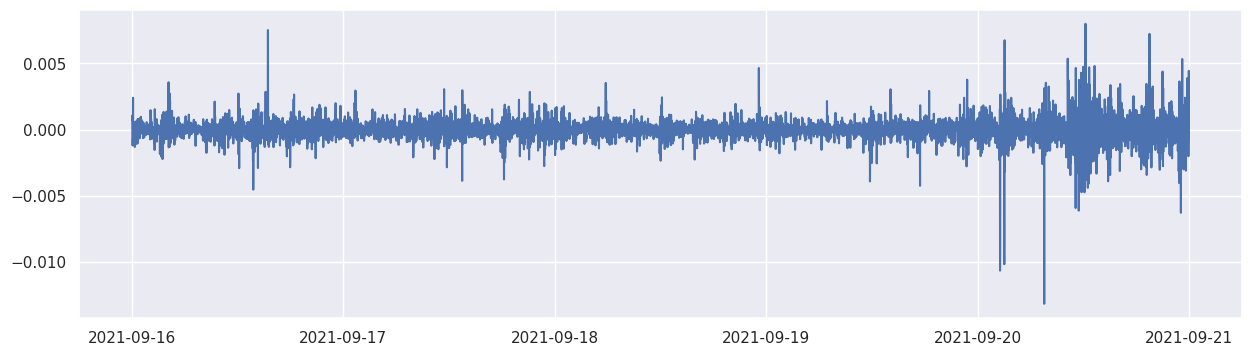

In [36]:
f = plt.figure(figsize = (15,4))

lret_btc = log_returns(btc_mini_df.Close,1)[1:]

plt.plot(lret_btc)

plt.show()

## 5. Typical time series visualizations  

### 5.1 Line plots

In [37]:
btc_df.head(3)

Asset_ID  Count       Open     High       Low      Close  \
datetime                                                                        
2018-01-01 00:01:00         1  229.0  13835.194  14013.8  13666.11  13850.176   
2018-01-01 00:02:00         1  235.0  13835.036  14052.3  13680.00  13828.102   
2018-01-01 00:03:00         1  528.0  13823.900  14000.4  13601.00  13801.314   

                        Volume          VWAP    Target  
datetime                                                
2018-01-01 00:01:00  31.550062  13827.062093 -0.014643  
2018-01-01 00:02:00  31.046432  13840.362591 -0.015037  
2018-01-01 00:03:00  55.061820  13806.068014 -0.010309

In [38]:
#btc_df.plot(x='datetime', y='Close', figsize=(8,5))
btc_df.Close.plot(figsize=(20,5))
plt.title('Evolution of BTC price')
plt.show()

In [39]:
print(btc_mini_df.iloc[0].time)
print(btc_mini_df.iloc[-2].time)
print(btc_mini_df.iloc[-1].time)

2021-09-16 00:00:00
2021-09-20 23:59:00
2021-09-21 00:00:00


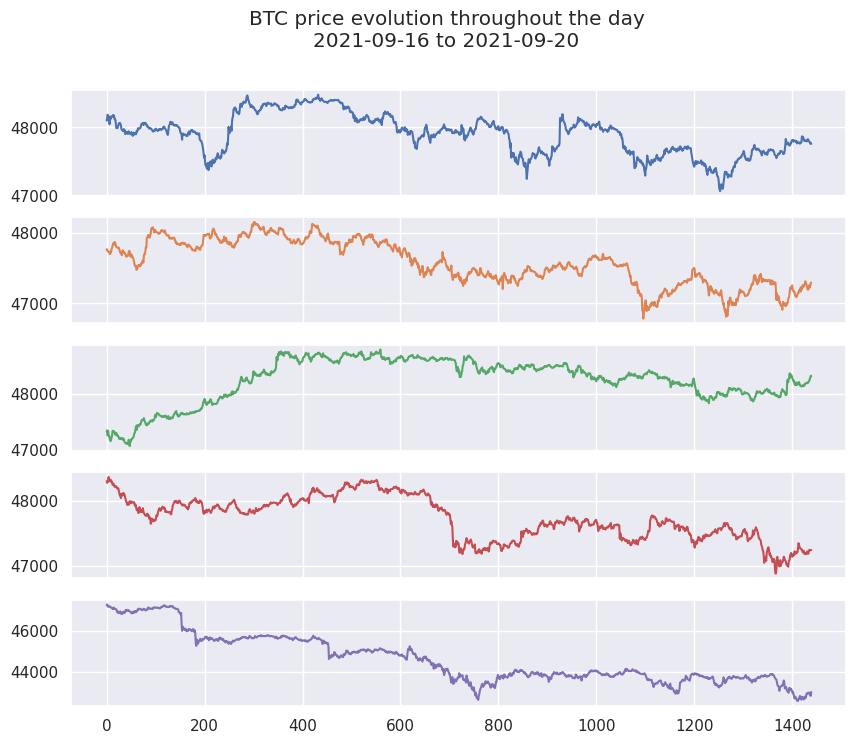

In [40]:
groups = btc_mini_df.groupby('day')

days = pd.DataFrame()

for name, group in groups:
    if name == 21: # skip the last day, which seems to be incomplete 
        continue
    days[name] = group.Close.values

days.plot(subplots=True, legend=False, figsize=(10,8), title='BTC price evolution throughout the day\n2021-09-16 to 2021-09-20');

### 5.2 Histograms and density plots 

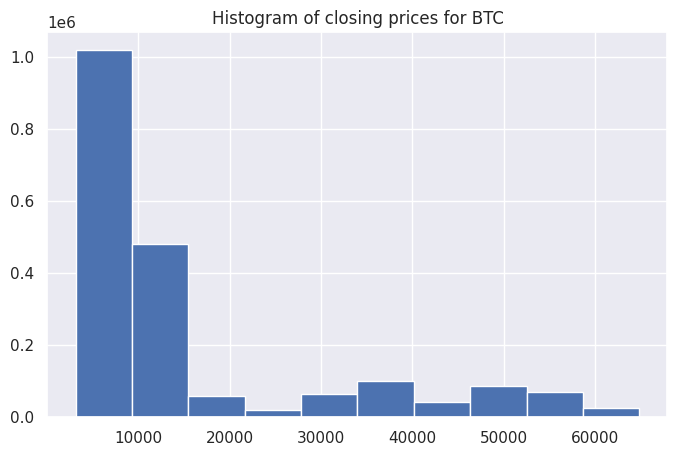

In [41]:
btc_df.Close.hist(figsize=(8,5))
plt.title('Histogram of closing prices for BTC')
plt.show()

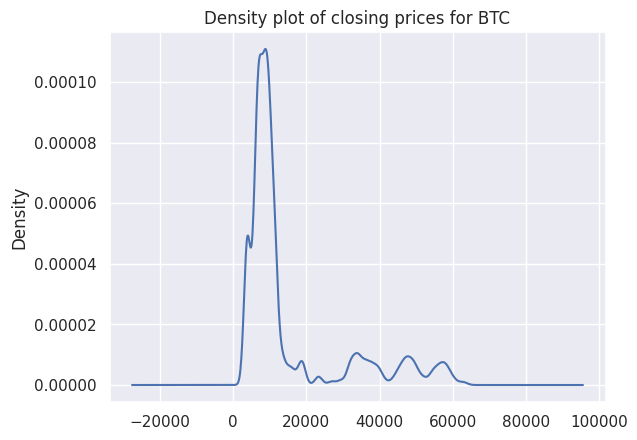

In [42]:
btc_df.Close.plot(kind='kde')
plt.title('Density plot of closing prices for BTC')
plt.show()

We can see that there is no noticable pattern from the line & box plot of bitcoin prices

### 5.3 Box and whisker plots

In [43]:
print(btc_df.iloc[0].name)
print(btc_df.iloc[-2].name)
print(btc_df.iloc[-1].name)

2018-01-01 00:01:00
2021-09-20 23:59:00
2021-09-21 00:00:00


In [44]:
btc_df.groupby(pd.Grouper(freq='A')).size()

datetime
2018-12-31    525599
2019-12-31    525600
2020-12-31    527040
2021-12-31    378721
Freq: A-DEC, dtype: int64

In [45]:
groups = btc_df.groupby(pd.Grouper(freq='A')) # group by year

years = pd.DataFrame([])

for name, group in groups: # iterate through the years
    tmp = group.groupby(pd.Grouper(freq='D')).Close.mean() # compute the daily mean
    tmp.index = tmp.index.strftime('%m-%d') # transform the index into 'mm-dd' only
    
    years = years.join(tmp, rsuffix=name.year, how = "outer") # join together yearly series (on the 'mm-dd' index) 
    
years.boxplot(figsize=(8,6))

plt.title('Box and whiskers plots for BTC close prices\n years 2018 to 2020');

Insights from the plot above:  
- median value for BTC changes slightly in the first 3 years
- 2018 and 2020 are quite rich in outliers compared to the other 2
- in 2021 BTC price spiked 

### 5.4 Heat map plots

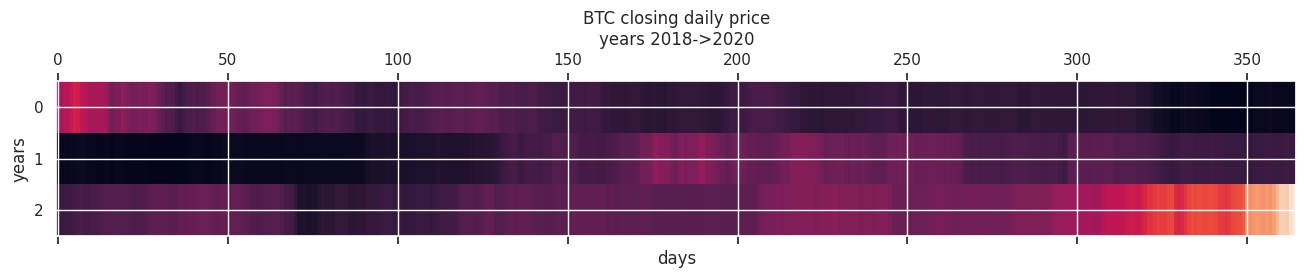

In [46]:
yrs = ['Close', 'Close2019', 'Close2020']

plt.matshow(years[yrs].dropna().T, interpolation=None, aspect='auto')

plt.title('BTC closing daily price\nyears 2018->2020')
plt.ylabel('years')
plt.xlabel('days')
plt.show()

- The problem we see in the plot above is that matshow seems to scale the colors relative to the whole 3 years worth of data. We've seen in the box plots above that that 2021 has a much higher mean value than all previous years.  

- So this upward going trend from one year to the next obscures the evolution of price throughout the year and makes it less visible.  

- Therefore first normalize (from min 0 to max 1) the closing price for each year and replot.

In [47]:
norm_years=(years-years.min())/(years.max()-years.min())

plt.matshow(norm_years[yrs].dropna().T, interpolation=None, aspect='auto')

plt.title('BTC closing daily price\nyears 2018->2020\normalized per year')
plt.ylabel('years')
plt.xlabel('days')

plt.show()

In [48]:
# heat map for 10 consecutive days
groups = btc_df.groupby(pd.Grouper(freq='D'))

days = pd.DataFrame([])

for i, (name, group) in enumerate(groups):
    tmp = group.Close
    tmp.index = tmp.index.strftime('%H:%M')
    
    days = days.join(tmp, rsuffix=name.year, how = "outer")
    
    if i == 9:
        print('break')
        break
    
plt.matshow(days.T, interpolation=None, aspect='auto')
plt.show()

break


### 5.5 Lag Plots

- Time series data implies a relationship between the value at a time t+1 and values at previous points in time.  

- The step size we take to go back in time is called **lag** (lag of 1, lag 2 etc).  

- Pandas provides the lag plot method. Let's examine the plot first.

In [49]:
from pandas.plotting import lag_plot

lag_plot(btc_df.groupby(pd.Grouper(freq='D')).Close.mean())

plt.show()

There is a strong positive relation between Close price at t and Close price at t+1

In [50]:
daily_df = btc_df.groupby(pd.Grouper(freq='D')).Close.mean()
daily_values = pd.DataFrame(daily_df.values)

lags = 8
columns = [daily_values]

for i in range(1,(lags + 1)):
    columns.append(daily_values.shift(i)) # downward shift by i positions

dataframe = pd.concat(columns, axis=1)

col_names = ['t'] + ['t-'+str(l) for l in range(1,(lags + 1))]

dataframe.columns = col_names

plt.figure(figsize=(16,6))

for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)

plt.show()

Observations: 
- The price at t correlates quite strongly with the price at previous time points (from t-1 to t-8), for lower price values (approximately half of maximum price). Beyond this value, the correlation becomes weaker the more we go back in time.  

- We know from the first line plot we looked at that Bitcoin price surged in 2021. Also, common knowledge of crypto assets market says that prices get very volatile when there is a lot of hype and more people get into the market. So, when prices are high, we expect a lot of volatility (more abrupt and erratic price changes across days). This is what the plots above tell us too.  

Conclusion: 
- There's a strong positive relationship with prices on previous days, but not so much when the market becomes hyped and volatile.

### 5.6 Autocorrelation plots

1. For a lag=1, we can compute the correlation between current time step value and previous time step value. If we have n time steps in our data, we'll have n-1 correlation values. These values can be anywhere inthe interval [-1,1].  

- -1 (strongest negative correlation)  
- 0 (no relationshop at all)  
- 1 (strongest positive correlation)  

2. Pandas provides the **autocorrelation_plot()** function for this calculation. 

In [51]:
from pandas.plotting import autocorrelation_plot

btc_days_df = btc_df.groupby(pd.Grouper(freq='D')).Close.mean()

autocorrelation_plot(btc_days_df)

plt.title('Autocorrelation plot\ndaily resolution')
plt.show()

- There is a statistically significant correlation with up tp 200-ish previous days average prices. The more we go back in time, the lower the correlation, until it starts to become slightly negative (statistically significant).  

- We know markets have a global evolution (bull / bear market) and local trends (short term excitement for the price of an asset and then slight corrections).

- Depending on the time resolution of data,we can expect the autocorrelation plot to capture the underlying long or short term trend

# 6. Power transforms 

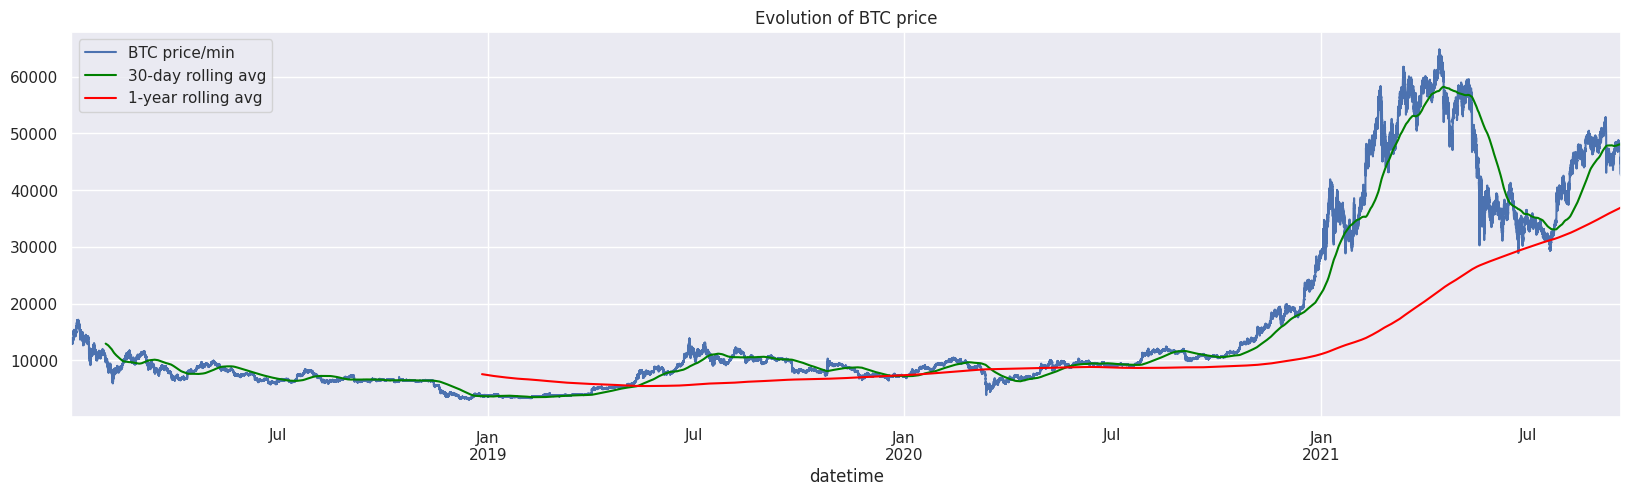

In [52]:
#btc_df.plot(x='datetime', y='Close', figsize=(8,5))

month_sz = 60 * 24 * 30
year_sz = 12 * month_sz

btc_df.Close.plot(figsize=(20,5))

# tail-rolling average transform
rolling_m = btc_df.Close.rolling(window=month_sz)
rolling_m_mean = rolling_m.mean()
rolling_m_mean.plot(color='green')

rolling_y = btc_df.Close.rolling(window=year_sz)
rolling_y_mean = rolling_y.mean()
rolling_y_mean.plot(color='red')

plt.legend(['BTC price/min', '30-day rolling avg', '1-year rolling avg'])
plt.title('Evolution of BTC price')
plt.show()

### Square root

Square root helps bring the data into a linear trend and well-behaved distribution (i.e. Gaussian, uniform) *when* the data is quadratic.

In [53]:
# sample data made randomly to demonstrate square root 

quad_data = [i**2 for i in range(1,200)]
plt.figure(figsize=(15,6))

## quadratic data plots
# line plot
plt.subplot(221)
plt.plot(quad_data)
plt.title('Made up data (qudratic)')

# histogram
plt.subplot(223)
plt.hist(quad_data)

## square root data plots
# linear plots
sq_data = np.sqrt(quad_data)
plt.subplot(222)
plt.plot(sq_data)
plt.title('Data after transformation (squared root)')

# histogram
plt.subplot(224)
plt.hist(sq_data)

plt.show()

In [54]:
# BTC price data using square root transformation since it is not accurately quadratic we infer no new insights from it

data = btc_df.Close
plt.figure(figsize=(15,6))

## quadratic data plots
# line plot
plt.subplot(221)
plt.plot(data)
plt.title('Real data (BTC closing price)')

# histogram
plt.subplot(223)
plt.hist(data)

## square root data plots
# linear plots
sq_data = np.sqrt(data)
plt.subplot(222)
plt.plot(sq_data)
plt.title('Data after transformation (squared root)')

# histogram
plt.subplot(224)
plt.hist(sq_data)

plt.show()

### Log transform

- Log transforms help when the data has an exponential trend, which is often likened to a hokey stick in asset price popular terminology.  

- We could say we see something like a hockey stick starting in Jan 2021.

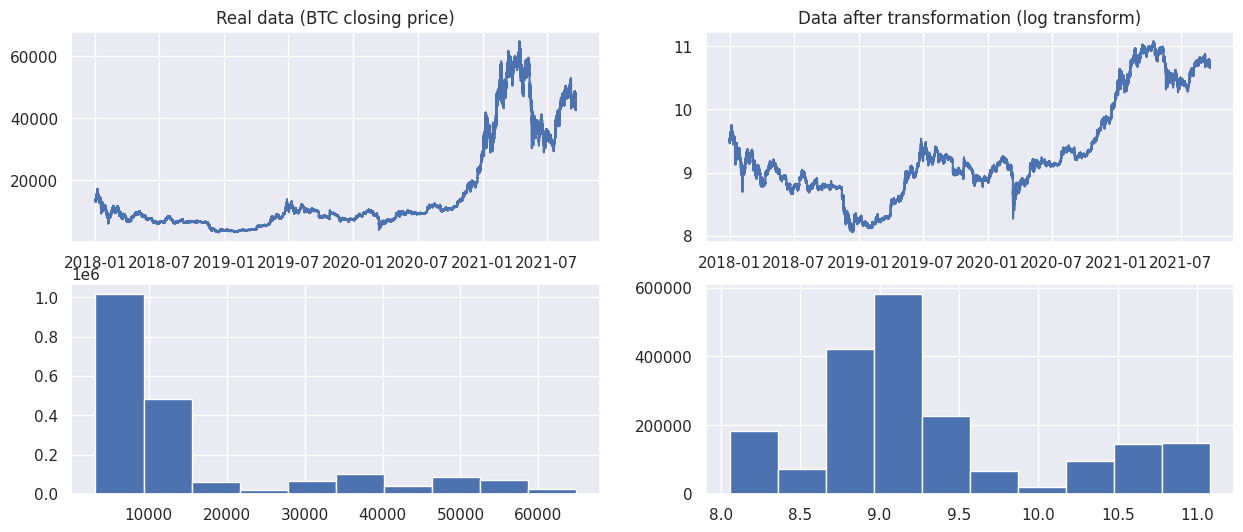

In [55]:
data = btc_df.Close
plt.figure(figsize=(15,6))

## initial data plots
# line plot
plt.subplot(221)
plt.plot(data)
plt.title('Real data (BTC closing price)')

# histogram
plt.subplot(223)
plt.hist(data)

## square root data plots
# linear plots
sq_data = np.log(data)
plt.subplot(222)
plt.plot(sq_data)
plt.title('Data after transformation (log transform)')

# histogram
plt.subplot(224)
plt.hist(sq_data)

plt.show()

This doesn't look like perfect power transformation for the data

### Automatic search for the right power transform

scipy package offers a method to automatically search for the most suitable power transformation for a dataset: <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html'>boxcox function</a>.

[Short overview]  
BoxCox procedure identifies the appropriate exponent (lambda = l) to use to transform data into a well-behaved distribution.    

The returned lambda value indicates the power to which all data should be raised.  

In order to do this, the Box-Cox power transformation searches from lambda = -5 to lambda = +5 until the best value is found.  

Best lambda means: the one for which the transformed data's standard deviation is the smallest. In this situation, the data has the highest likelihood – but not a guarantee – to be normally distributed.

Table 1: Common Box-Cox Transformations

| lambda | transformed Y |   
| --- | --- |   
| -2 | 	Y^(-2) = 1/Y^2
| -1 | 	Y^(-1) = 1/Y^1
| -0.5 | 	Y^(-0.5) = 1/(Sqrt(Y))
| | 	log(Y)
| 0.5 | 	Y^(0.5) = Sqrt(Y)
| 1 | 	Y^1 = Y
| 2 | 	Y^2

best lambda: -0.5154025041386202


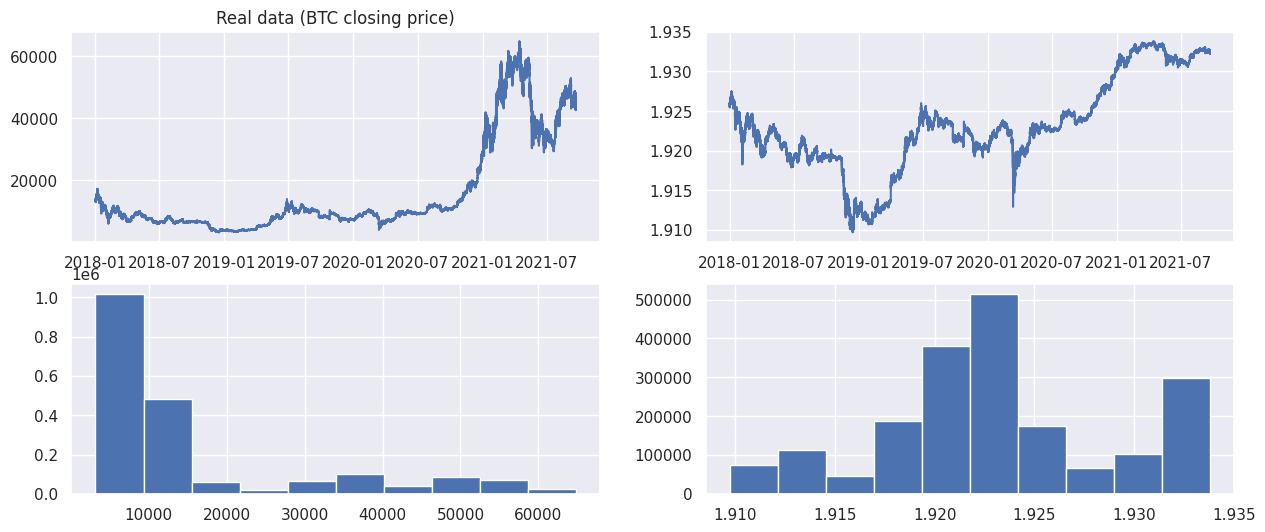

In [56]:
# automatically box-cox transform a time series
from scipy.stats import boxcox

plt.figure(figsize=(15,6))

## initial data plots
# line plot
plt.subplot(221)
plt.plot(data)
plt.title('Real data (BTC closing price)')

# histogram
plt.subplot(223)
plt.hist(data)

## transformed data plots
temp_df = pd.DataFrame(btc_df.Close)
temp_df.columns = ['Close']

temp_df['Close'], lambda_val = boxcox(temp_df['Close'])
print(f'best lambda: {lambda_val}')

# line plot
plt.subplot(222)
plt.plot(temp_df['Close'])

# histogram
plt.subplot(224)
plt.hist(temp_df['Close'])
plt.show()

- The best power transformation for our data seems to be the reciprocal square root (lambda = -0.5), according to the boxcox method.  

- The distribution we obtain is the closest to a normal distribution, so far. But the trend is not linear. We see what happens with data from previous bull markets (2018 highs become more pronounced after this transformation). Too bad we don't have data from December 2017, when the actual peak of the previous bull market happened for BTC prices.

# 7. Temporal structure of time series data

### 7.1 White noise   

A time series is white noise if the variables are independent and identically distributed with a mean of zero.  

White noise is important in time series forecasting for two reasons:  
1. **Prediction**: If a time series is white noise, then it's by definition random and cannot be predicted.
2. **Diagnosis**: The errors of a time series model should be white noise. What does this mean ? That the erros contain no information, as all the information from the time series was harnessed by the model itself. And the opposite ? If the erors are not white noise, the model can be improved further.

However, it's generally expected that any real like time series will contains a certain amount of white noise.

A series is *not* white noise if:
- the mean is non zero
- the variance changes over time
- the is a significant autocorrelation (with lagged values)

In [57]:
lret_btc = log_returns(btc_df.Close,1)[1:]

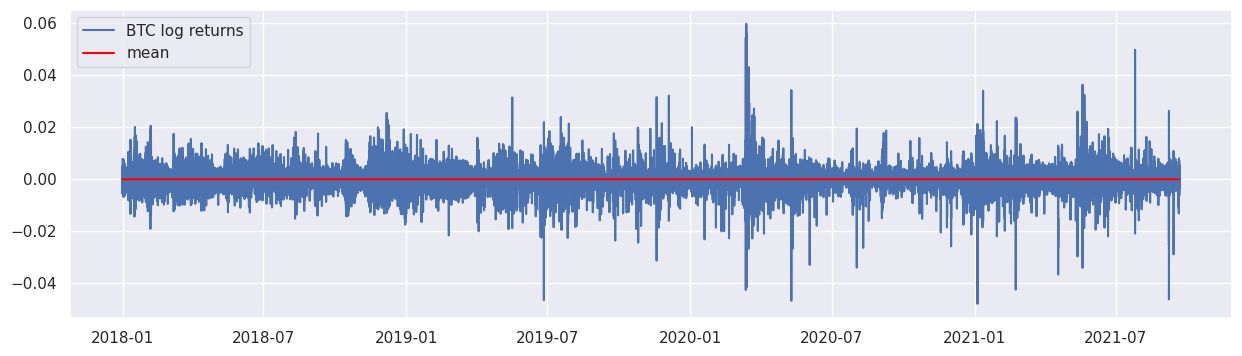

In [58]:
f = plt.figure(figsize = (15,4))

plt.plot(lret_btc)
plt.plot(lret_btc.index, [lret_btc.mean()] * len(lret_btc), color='red')
plt.legend(['BTC log returns', 'mean'])

plt.show()

In [59]:
print(lret_btc.describe())

count    1.956959e+06
mean     5.789393e-07
std      1.221378e-03
min     -4.789219e-02
25%     -3.609924e-04
50%      1.820329e-06
75%      3.653205e-04
max      5.974073e-02
Name: Close, dtype: float64


- Mean and std are almost 0. Since variance = std^2, it's also close to 0. 

- Since we have a lot of data, we can split it into shorter time intervals and see if the summary stats change. 

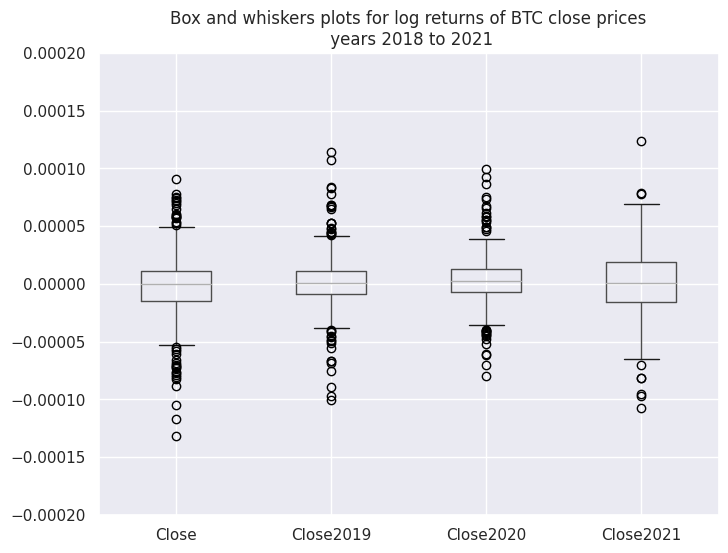

In [60]:
groups = lret_btc.groupby(pd.Grouper(freq='A')) # group by year

years = pd.DataFrame([])

for name, group in groups: # iterate through the years
    tmp = group.groupby(pd.Grouper(freq='D')).mean() # compute the daily mean
    tmp.index = tmp.index.strftime('%m-%d') # transform the index into 'mm-dd' only
    
    years = years.join(tmp, rsuffix=name.year, how = "outer") # join together yearly series (on the 'mm-dd' index) 
    
years.boxplot(figsize=(8,6))
plt.ylim([-0.0002, 0.0002])
plt.title('Box and whiskers plots for log returns of BTC close prices\n years 2018 to 2021');

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning:

invalid value encountered in log



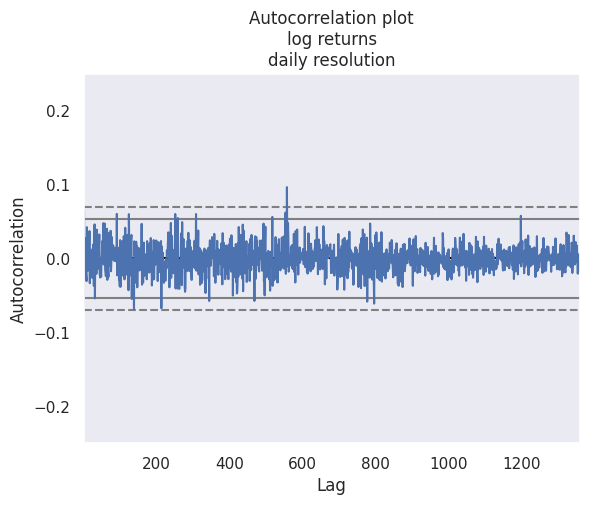

In [61]:
# autocorrelation plot for the log returns
lret_btc = log_returns(btc_df,1)[1:]

temp_df = lret_btc.groupby(pd.Grouper(freq='D')).Close.mean()

autocorrelation_plot(temp_df)

plt.title('Autocorrelation plot\nlog returns\ndaily resolution')
plt.ylim([-0.25, 0.25])
plt.show()

- The spikes past the 95% (solid grey line) and 99% (dotted grey line) confidence levels look like a statistical fluke, in this context.  

- We can conclude that log returns are white noise and cannot be predicted

### 7.2 Random walk  

- First, let's see a perfect random walk dataset and then we'll look at our own data again.  

- A time series is constructed through a *random walk* process as follows:  
y(t) = X(t-1) + rnd_step,  
where rnd_step is randomly selected from {-1, 1} and os is x(0).  

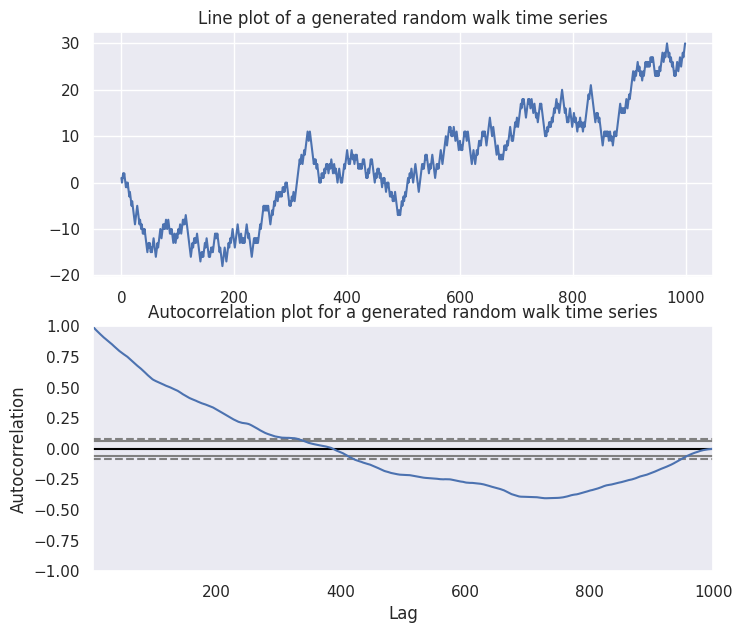

In [62]:
from random import seed
from random import random

seed(101)

values = [-1 if random() < 0.5 else 1] # x(0)

for i in range(1, 1000):
    rnd_step = -1 if random() < 0.5 else 1
    y_t = values[i-1] + rnd_step
    values.append(y_t)

plt.figure(figsize=(8,7))

# linear plot
plt.subplot(211)    
plt.plot(values)
plt.title('Line plot of a generated random walk time series')

# correlogram
plt.subplot(212)    
autocorrelation_plot(values)
plt.title('Autocorrelation plot for a generated random walk time series')

plt.show()

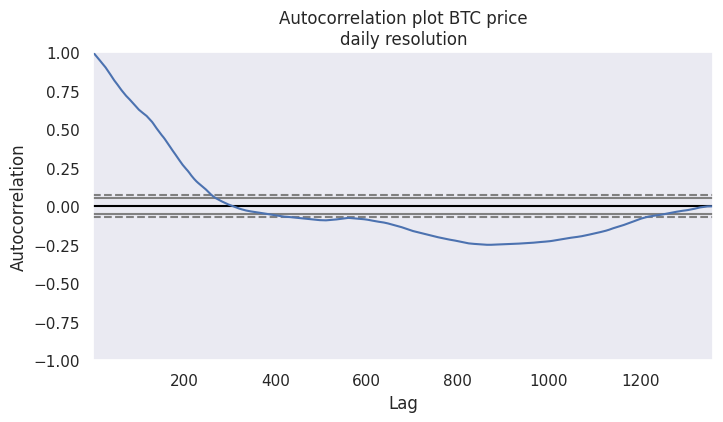

In [63]:
# plotting the autocorrelation plot of BTC price plotted above 
from pandas.plotting import autocorrelation_plot

btc_days_df = btc_df.groupby(pd.Grouper(freq='D')).Close.mean()

plt.figure(figsize=(8,4))
autocorrelation_plot(btc_days_df)

plt.title('Autocorrelation plot BTC price\ndaily resolution')
plt.show()

In [64]:
# calculate the stationarity of our closing price data
from statsmodels.tsa.stattools import adfuller

# statistical test
result = adfuller(btc_days_df)

print(f'ADF result: {result[0]} p={result[1]:.3f}') 

print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')

ADF result: -0.5461669071950369 p=0.883
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


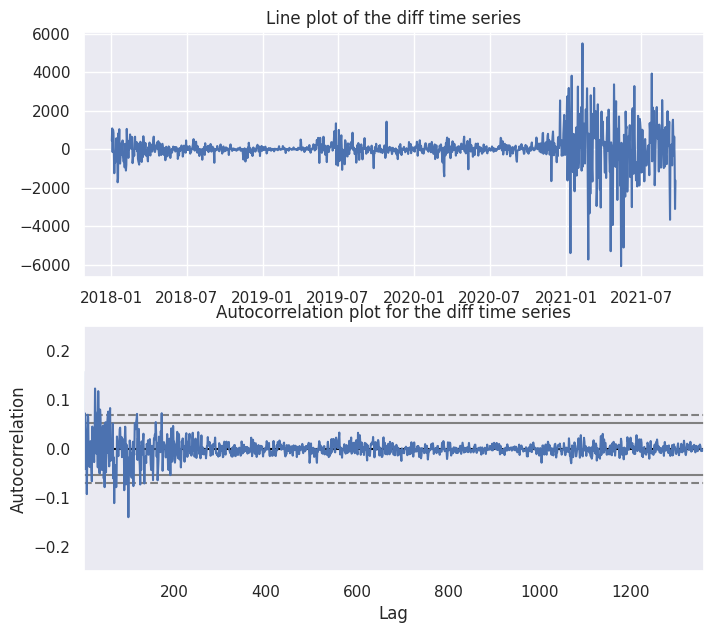

In [65]:
diff_df = btc_days_df.diff()[1:]

plt.figure(figsize=(8,7))

# linear plot
plt.subplot(211)    
plt.plot(diff_df)
plt.title('Line plot of the diff time series')

# correlogram
plt.subplot(212)    
autocorrelation_plot(diff_df)
plt.title('Autocorrelation plot for the diff time series')
plt.ylim([-0.25, 0.25])
plt.show()

It looks like we get white noise when we remove non-stationarity, which we know contains no structure that we can model and use for prediction.  

A naive model for white noise is:  
*Close(t) = Close(t-1)*  
This is also called the **persistence model**  
Just because we know the next value is a function of the current value but we have no way to build a model of this relationship.  

The persistence model will be the baseline for any future model.

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# prepare dataset
train_size = int(len(btc_days_df) * 0.5)
train, test = btc_days_df[0:train_size], btc_days_df[train_size:]

# persistence
preds = []
prev = train[-1]

for i in range(len(test)):
    preds.append(prev)
    prev = test[i]
    
rmse = sqrt(mean_squared_error(test, preds))
print(f'Persistence model RMSE: {rmse:.3f}')

# the data is likely to be a random walk time series

Persistence model RMSE: 1045.388


### 7.3 Time series decomposition  

A time series is conceptualized as having these types of components:
1. **systematic components**
    - **level** = overall average value 
    - **trend** = temporary upward or downward movement 
    - **seasonality** = a short-term cycle that repeats itself   
2. **non-systematic components**
    - **random noise**
    
The 4 components are thought to combine in two possible ways into a time series:  
- additive  
    *Close(t) = level + trend + seasonality + noise*  
        
- multiplicative  
    *Close(t) = level * trend * seasonality * noise*  
    
In reality, time series data can have:
- both additive and multiplicative components  
- both upward and downward trends (especially security price data)  
- non-repeating and repeating cycles

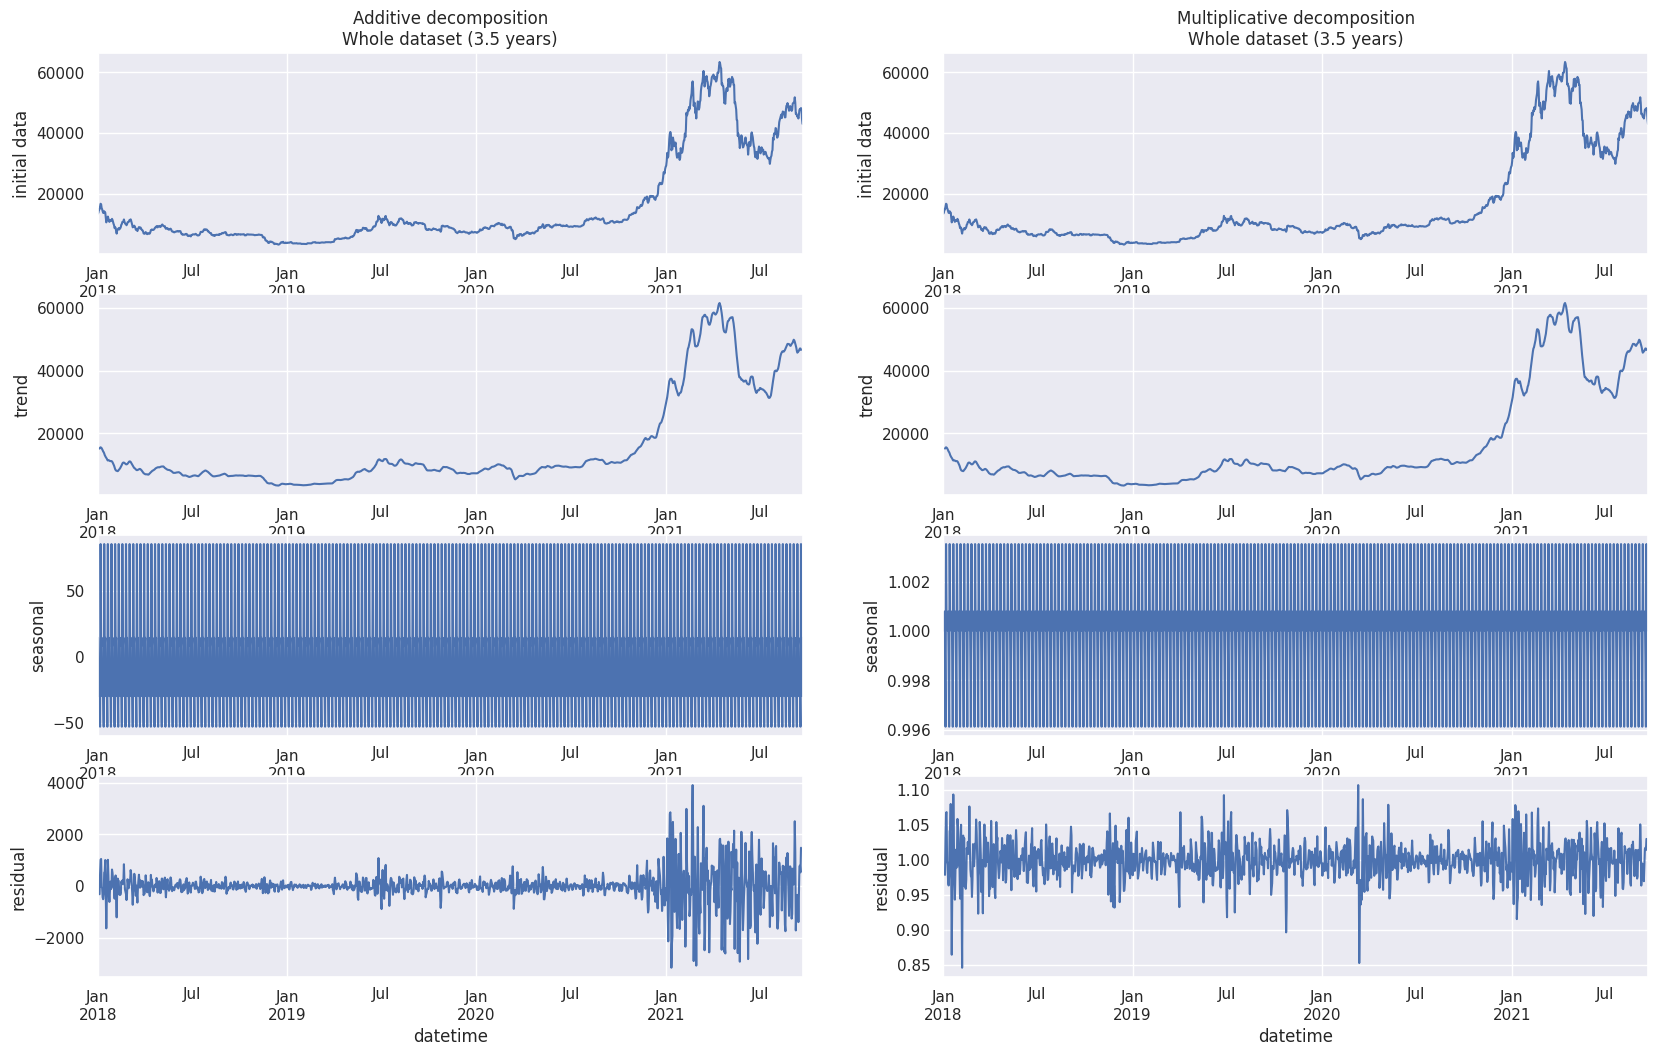

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

##whole data
data = btc_days_df
decomp = seasonal_decompose(data, model='additive')

plt.figure(figsize=(20,12))

plt.subplot(421)
data.plot()
plt.ylabel('initial data')
plt.title('Additive decomposition\nWhole dataset (3.5 years)')

plt.subplot(423)
decomp.trend.plot()
plt.ylabel('trend')

plt.subplot(425)
decomp.seasonal.plot()
plt.ylabel('seasonal')

plt.subplot(427)
decomp.resid.plot()
plt.ylabel('residual')

##small window
data = btc_days_df
decomp = seasonal_decompose(data, model='multiplicative')

plt.subplot(422)
data.plot()
plt.ylabel('initial data')
plt.title('Multiplicative decomposition\nWhole dataset (3.5 years)')

plt.subplot(424)
decomp.trend.plot()
plt.ylabel('trend')

plt.subplot(426)
decomp.seasonal.plot()
plt.ylabel('seasonal')

plt.subplot(428)
decomp.resid.plot()
plt.ylabel('residual')

plt.show()

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

##whole data
data = btc_days_df[:160]
decomp = seasonal_decompose(data, model='additive')

plt.figure(figsize=(20,12))

plt.subplot(421)
data.plot()
plt.ylabel('initial data')
plt.title('Additive decomposition\nSmaller time window (0.5 years)')

plt.subplot(423)
decomp.trend.plot()
plt.ylabel('trend')

plt.subplot(425)
decomp.seasonal.plot()
plt.ylabel('seasonal')

plt.subplot(427)
decomp.resid.plot()
plt.ylabel('resdual')

##small window
data = btc_days_df[:160]
decomp = seasonal_decompose(data, model='multiplicative')

plt.subplot(422)
data.plot()
plt.ylabel('initial data')
plt.title('Multiplicative decomposition\nSmaller time window (0.5 years)')

plt.subplot(424)
decomp.trend.plot()
plt.ylabel('trend')

plt.subplot(426)
decomp.seasonal.plot()
plt.ylabel('seasonal')

plt.subplot(428)
decomp.resid.plot()
plt.ylabel('resdual')

plt.show()

### 7.4 Removing trends  

To clarify, a trend is a *systematic change* that does not seem to be periodic. In our case, a bull market or a bear market have upward / downward trends.  

Why we'd want to look into the trend of the dataset:  
- can inform **which modelling algorithm** we can use
- we could **remove** the identified trend and simplify prediction (remove information)
- trend information can become an **extra feature** for training (add information)

We can group trends into two large groups:
- deterministic - they are consistent(e.g. temperatures across years)
- stochastic - they tend to swtich between up and down  

We can also call them:  
- global trends
- local trends (I guess the bear and the bull market would fit into a local trend)

Time-series that contain a trend are labelled **non-stationary**. We can *detrend* the data and make it stationary.  

The interesting thing is that detrending "is common when using statistical methods for time series forecasting, but does not always improve results when using machine learning models." (<a href='https://machinelearningmastery.com/introduction-to-time-series-forecasting-with-python/'>Introduction to Time Series Forecasting With Python</a> by Jason Brownlee).  
Something to keep in mind.

There are two main ways to detrend:  
- differencing
- model the trend 

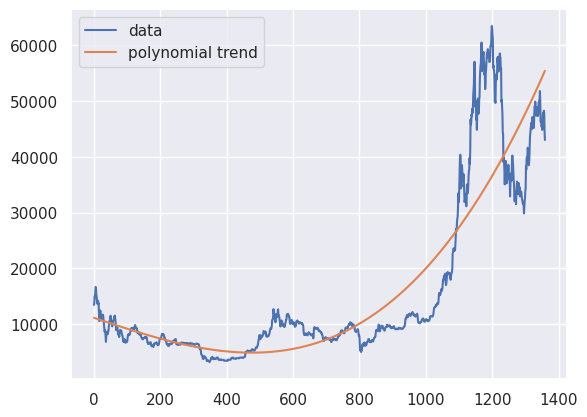

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

data = btc_days_df

# create our independent variable; our X values are the timesteps, 
# but we can make it just as well an array from 0 to ..., since the 
# actual value does not matter
X = [i for i in range(0, len(data))]
X = np.reshape(X, (len(X), -1))

y = data.values # dependent variable is the closing price

pf = PolynomialFeatures(degree=3) # a cubic polynomial model
Xp = pf.fit_transform(X)          # transform X into a quadratic form (each row i will be: x[i]^0 x[i]^1 x[i]^2 x[i]^3) 

# fit the quadratic model through ordinary least squares Linear Regression
md2 = LinearRegression() 
md2.fit(Xp, y)

trendp = md2.predict(Xp)

plt.plot(X, y)
plt.plot(X, trendp)
plt.legend(['data', 'polynomial trend'])
plt.show()

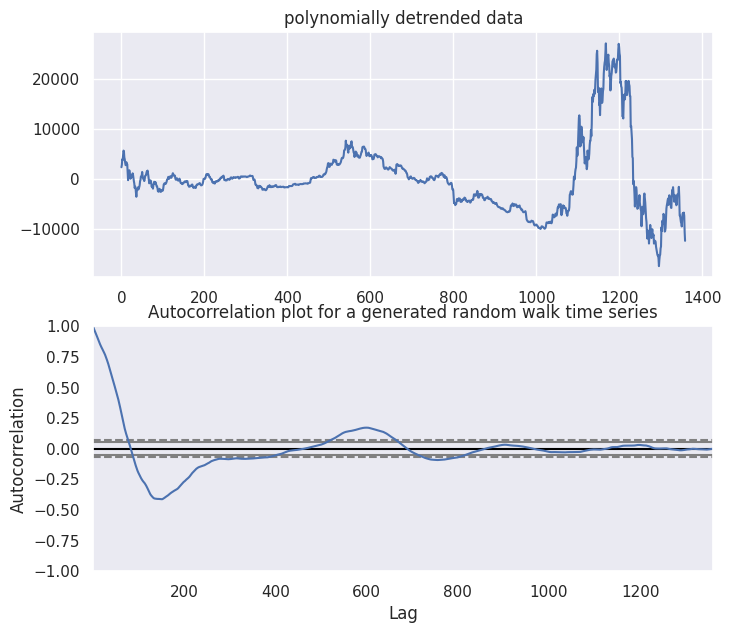

In [70]:
# plot of detrended data
plt.figure(figsize=(8,7))

detrpoly = [y[i] - trendp[i] for i in range(0, len(y))]

plt.subplot(211)    
plt.plot(X, detrpoly)
plt.title('polynomially detrended data')

# correlogram
plt.subplot(212)    
autocorrelation_plot(detrpoly)
plt.title('Autocorrelation plot for a generated random walk time series')

plt.show()

In [71]:
# detrended data doesn't have pattern visible to naked eye
# let's compute the prediction error
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y, trendp)
rmse = np.sqrt(mean_squared_error(y, trendp))
print('r2:', r2)
print('rmse', rmse)

r2: 0.7904972202122598
rmse 6924.059986425642


### 7.5 Removing seasonality   

*Seasonality* is a short-term pattern that repeats itself at a fixed frequency. A one-time cycle is just that, a cycle, not seasonality. 

Its effect:  
- may obscure the pattern in our data (and we remove it)
- can be picked up by our modelling algorithm (we can use it as extra feature)  
Both are valid approaches.  

There are many method to deseasonalize a dataset. Not all can be used in forecasting problems. Some can only be used in analysis of past data. Something to keep in mind for other type of problems.  

Just as with detrending, we can do:  
- differencing  
- modelling

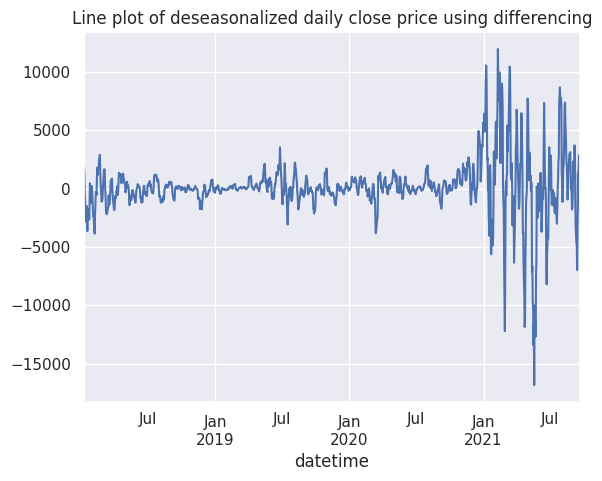

In [72]:
# differencing by subtract the closing price of each day with the same day 1 week before
tmp = btc_days_df

lag_df = pd.concat([tmp.shift(7, axis = 0), tmp], axis=1)[7:] # remove the first 7 non differenced rows

lag_df.columns = ['t', 't+7']

diff_data = lag_df['t+7'] - lag_df['t']

diff_data.plot()
plt.title('Line plot of deseasonalized daily close price using differencing')

plt.show()

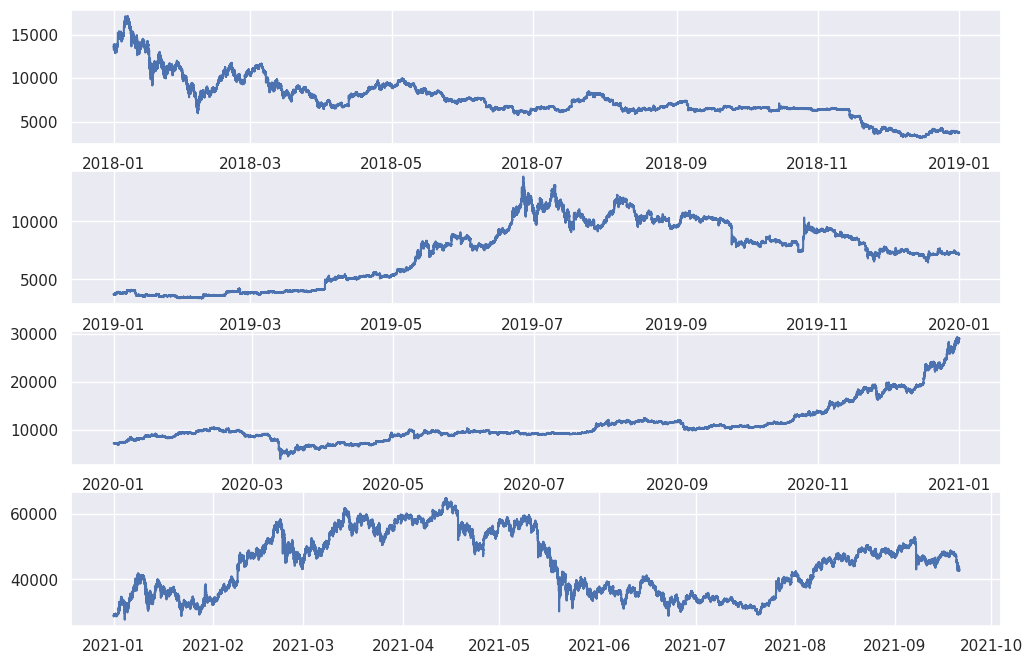

In [73]:
# modelling seasonality as 4th degree polynomial
# y = a * x + b * x^2 + c * x^3 + d * x^4 + e
groups = btc_df.groupby(pd.Grouper(freq='A'))

count = len(groups)

plt.figure(figsize=(12,8))

for i, (name, group) in enumerate(groups):
    plt.subplot(count*100 + 10 + i+1)
    plt.plot(group.index.values, group.Close.values)
plt.show()

It's hard to see if there's a seasonal componentt, constistent across all years.

Using the daily closing price, I'm going to do the following:
- break the dataset into four years
- try to fit seasonality models (4th degree polynomials) of 3 different frequencies: weekly, monthly, trimestrial

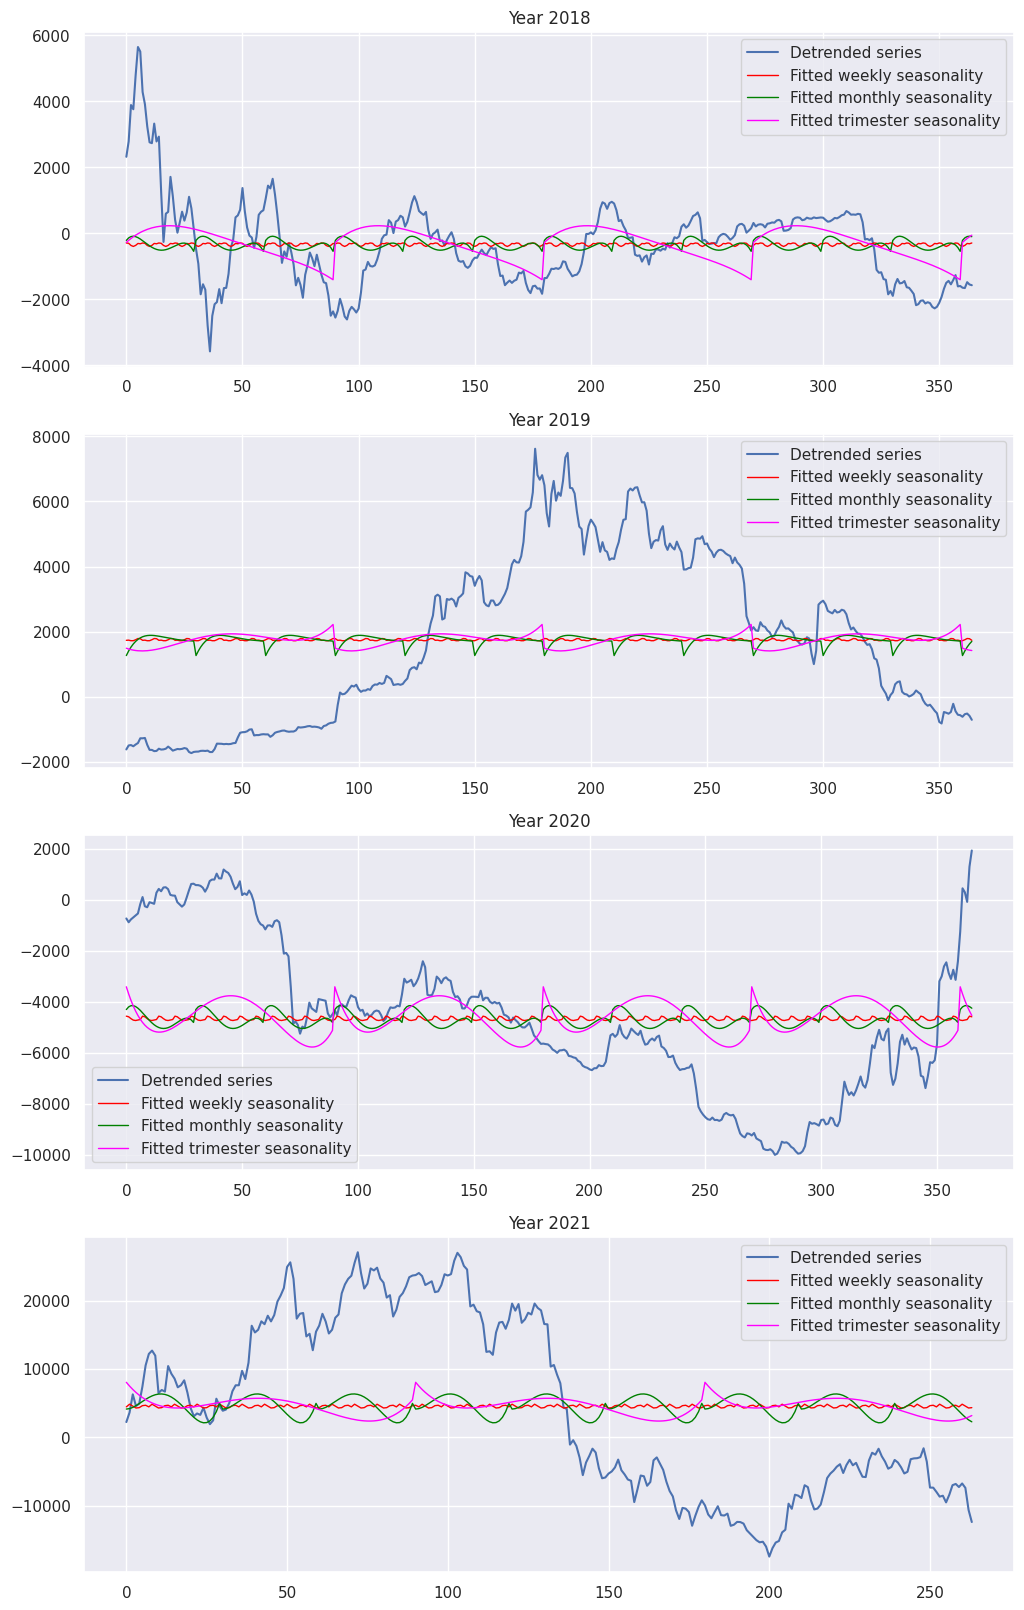

In [74]:
groups = btc_days_df.groupby(pd.Grouper(freq='A'))
days_per_year = []
for name, group in groups:
    days_per_year.append(len(group.values))

plt.figure(figsize=(12,20))

start = 0
years = [2018, 2019, 2020, 2021]
count = len(days_per_year)

legend = ['Detrended series', 'Fitted weekly seasonality', 'Fitted monthly seasonality', 'Fitted trimester seasonality']

for i, days in enumerate(days_per_year):
    series = detrpoly[start:start+days]
    
    plt.subplot(count*100 + 10 + i+1)
    plt.title(f'Year {years[i]}')
    
    plt.plot(series)
    
    intervals = [7, 30, 90]
    cols = ['red', 'green', 'magenta']

    for cnt, inter in enumerate(intervals):
        X = [i%inter for i in range(0, len(series))] # let's try to model a weekly seasonality as a sinusoid
        y = series

        degree = 4

        coef = np.polyfit(X, y, degree)

        # create curve
        curve = list()
        for i in range(len(X)):
            value = coef[-1]
            for d in range(degree):
                value += X[i]**(degree-d) * coef[d]
            curve.append(value)
        
        # plot curve over original data
        plt.plot(curve, color=cols[cnt], linewidth=1)
        plt.legend(legend)
    start = start+days
plt.show()

The seasonality amplitude doesn't have significant effect on price whether we remove or not

# 8. Model evaluation

In ML uspervised learning problems we usually use a train-test split to separate our dataset into data to use for training and data to use for testing.  

How do we do this with time series data, where we can't just do a random split, since we have to respect the order of the data ?

Apparently, there are three common method to split data for backtesting:
1. Train-test split respecting the temporal order  
2. Multiple train-test split respecting the temporal order  
3. Walk-forward validation, where we update the model every time we reveice a new piece of data


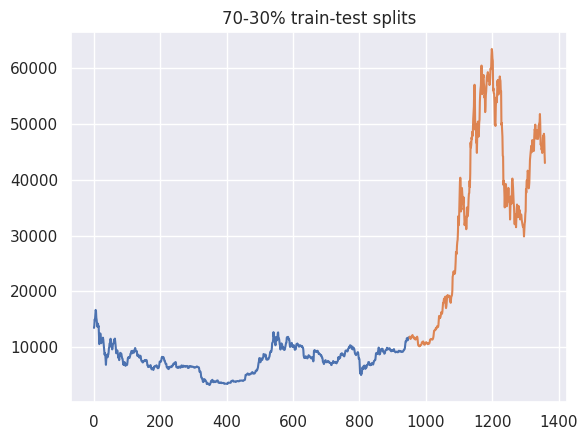

In [75]:
# train-test split on temporal data
X = btc_days_df.values

train_size = int(len(X) * 0.7)
train, test = X[0:train_size], X[train_size:len(X)]

plt.plot(train)
plt.plot([None for i in train] + [x for x in test])

plt.title('70-30% train-test splits')
plt.show()

**Evaluating the persistence model**

The persistence model was the naive one that predicts for the next time step the same value from the current time step. This seems like a good baselin model for security price, since the linear plot for asset price looked like a random walk anyway. And in random walk remember we computed the next value as a linear transformation of the current value.  

1. Transform the Closing price dataset into a supervised learning problem
2. Establish the train and test sets
3. Define the persistence model
4. Make predictions and establish a baseline performance

In [76]:
# Multiple train-test split respecting the temporal order
data = btc_days_df

df = pd.concat([data.shift(1), data], axis=1)
df.columns = ['t', 't+1']

print(dataframe.head(5))

              t           t-1           t-2           t-3           t-4  t-5  \
0  13440.450886           NaN           NaN           NaN           NaN  NaN   
1  13885.451885  13440.450886           NaN           NaN           NaN  NaN   
2  14968.705857  13885.451885  13440.450886           NaN           NaN  NaN   
3  14820.753062  14968.705857  13885.451885  13440.450886           NaN  NaN   
4  15828.013939  14820.753062  14968.705857  13885.451885  13440.450886  NaN   

   t-6  t-7  t-8  
0  NaN  NaN  NaN  
1  NaN  NaN  NaN  
2  NaN  NaN  NaN  
3  NaN  NaN  NaN  
4  NaN  NaN  NaN  


In [77]:
X = df.values

train_size = int(len(X) * 0.7)

train, test = X[1:train_size], X[train_size:]

X_train, y_train = train[:,0], train[:,1]
X_test, y_test = test[:,0], test[:,1]

In [78]:
def pers_predict(x):
    return x

In [79]:
preds = []

for x in X_test:
    yhat = pers_predict(x)
    preds.append(yhat)

rmse = sqrt(mean_squared_error(y_test, preds))

print(f'RMSE: {rmse:.3f}')

RMSE: 1334.401


**Visualize residuals**

Beyond predicting and evaluating the error, we should look at the errors of each prediction. Here's why:  
- the errors should have a mean at 0. If not, it means our model is biased (tends to err more on the positive or more on the negative side). If we have a biased model, we should know. The most naive way to correct for this is to subtract the mean of residuals from all future predictions.  
- errors should be random (no pattern, no structure). Otherwise, it means the errors contain information. Information that should have been captured by our model. So we need to improve the model.  

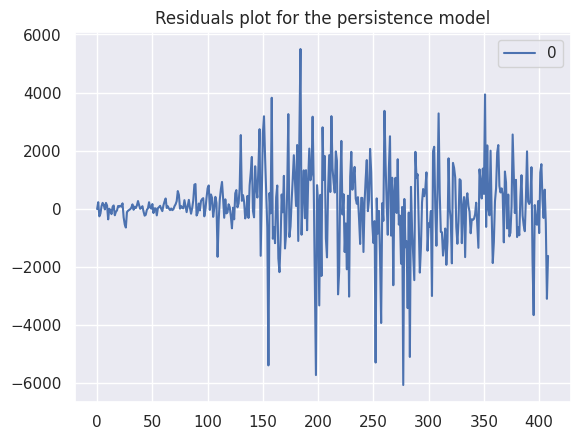

In [80]:
# calculate residuals
residuals = [y_test[i]-preds[i] for i in range(len(preds))]
residuals = pd.DataFrame(residuals)

residuals.plot()
plt.title('Residuals plot for the persistence model')
plt.show()

In [81]:
# summary statistics
print(residuals.describe())

                 0
count   409.000000
mean     76.589036
std    1333.832682
min   -6065.863346
25%    -365.700573
50%      85.100873
75%     655.571574
max    5496.937655


The mean is not 0. The persistence model tends to predict higher values than the real ones. This means we should correct for this bias. Solutions range from subtracting 76 (the mean of residuals) for predictions to complex bias correction methods.

**Residuals distribution**

The distribution should be Gaussian, otherwise it means there's something worng with our model.

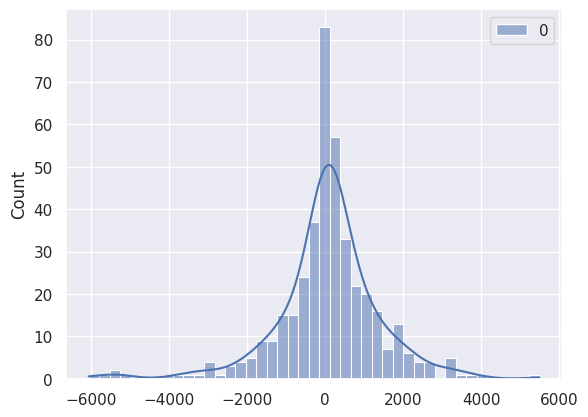

In [82]:
import seaborn as sns

sns.histplot(data = residuals, kde=True)

plt.show()

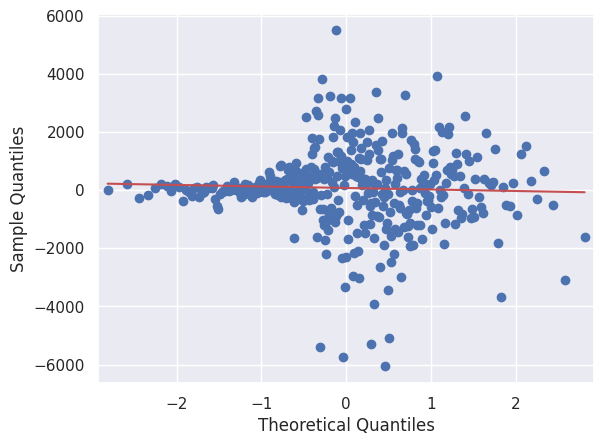

In [83]:
from statsmodels.graphics.gofplots import qqplot

res_arr = np.array(residuals)
qqplot(res_arr, line='r')
plt.show()

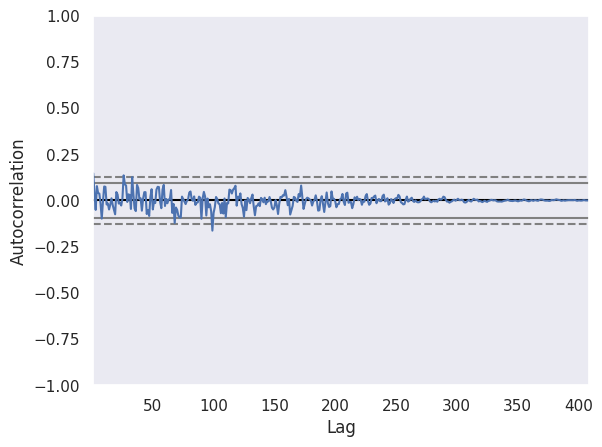

In [84]:
# Autocorrelation plot of residuals
# We should find no autocorrelation. If there is some, we should improve our model and capture it.  
autocorrelation_plot(residuals)
plt.show()

# 9. Prediction Models

In [67]:
import json
import requests

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

sns.set_palette('Set2')
%matplotlib inline

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Projects/BDA/input/supplemental_train.csv")
data

timestamp  Asset_ID   Count          Open          High  \
0        1632182460         3   561.0      2.079028      2.080605   
1        1632182460         2   169.0    541.006000    541.200000   
2        1632182460         0   400.0    363.737500    363.900000   
3        1632182460         1  1933.0  42986.143333  43001.000000   
4        1632182460         4   348.0      0.208326      0.208400   
...             ...       ...     ...           ...           ...   
2518273  1642982400         9   214.0    112.293000    112.470000   
2518274  1642982400        10    25.0   1833.565000   1834.700000   
2518275  1642982400        13   235.0      0.057520      0.057618   
2518276  1642982400        12   492.0      0.200940      0.201066   
2518277  1642982400        11    40.0    156.764000    156.930000   

                  Low         Close        Volume          VWAP    Target  
0            2.072000      2.076458  2.804627e+05      2.075869  0.003085  
1          539.700000    540.722000  1.889432e+02    540.716930 -0.000607  
2          363.000000    363.654000  8.792685e+02    363.499554 -0.019375  
3        42898.000000  42947.065566  9.183861e+01  42942.976718 -0.000374  
4            0.207800      0.208200  1.051337e+06      0.208077 -0.001233  
...               ...           ...           ...           ...       ...  
2518273    111.840000    111.983333  1.243860e+03    112.127619       NaN  
2518274   1831.050000   1833.018333  4.190290e+00   1833.173692       NaN  
2518275      0.057389      0.057478  8.988253e+05      0.057519       NaN  
2518276      0.199352      0.200093  2.983796e+06      0.200413       NaN  
2518277    156.200000    156.550000  7.439747e+01    156.638720       NaN  

[2518278 rows x 10 columns]

In [5]:
df = data.drop(['Target', 'Asset_ID', 'Count'],axis = 1, inplace = True)

In [6]:
data

timestamp          Open          High           Low         Close  \
0        1632182460      2.079028      2.080605      2.072000      2.076458   
1        1632182460    541.006000    541.200000    539.700000    540.722000   
2        1632182460    363.737500    363.900000    363.000000    363.654000   
3        1632182460  42986.143333  43001.000000  42898.000000  42947.065566   
4        1632182460      0.208326      0.208400      0.207800      0.208200   
...             ...           ...           ...           ...           ...   
2518273  1642982400    112.293000    112.470000    111.840000    111.983333   
2518274  1642982400   1833.565000   1834.700000   1831.050000   1833.018333   
2518275  1642982400      0.057520      0.057618      0.057389      0.057478   
2518276  1642982400      0.200940      0.201066      0.199352      0.200093   
2518277  1642982400    156.764000    156.930000    156.200000    156.550000   

               Volume          VWAP  
0        2.804627e+05      2.075869  
1        1.889432e+02    540.716930  
2        8.792685e+02    363.499554  
3        9.183861e+01  42942.976718  
4        1.051337e+06      0.208077  
...               ...           ...  
2518273  1.243860e+03    112.127619  
2518274  4.190290e+00   1833.173692  
2518275  8.988253e+05      0.057519  
2518276  2.983796e+06      0.200413  
2518277  7.439747e+01    156.638720  

[2518278 rows x 7 columns]

In [7]:
df = data.rename(columns = { "Open": "open", "High": "high", "Low": "low", "Volume": "volumeto", "VWAP": "volumefrom", "Close": "close"})

In [8]:
df

timestamp          open          high           low         close  \
0        1632182460      2.079028      2.080605      2.072000      2.076458   
1        1632182460    541.006000    541.200000    539.700000    540.722000   
2        1632182460    363.737500    363.900000    363.000000    363.654000   
3        1632182460  42986.143333  43001.000000  42898.000000  42947.065566   
4        1632182460      0.208326      0.208400      0.207800      0.208200   
...             ...           ...           ...           ...           ...   
2518273  1642982400    112.293000    112.470000    111.840000    111.983333   
2518274  1642982400   1833.565000   1834.700000   1831.050000   1833.018333   
2518275  1642982400      0.057520      0.057618      0.057389      0.057478   
2518276  1642982400      0.200940      0.201066      0.199352      0.200093   
2518277  1642982400    156.764000    156.930000    156.200000    156.550000   

             volumeto    volumefrom  
0        2.804627e+05      2.075869  
1        1.889432e+02    540.716930  
2        8.792685e+02    363.499554  
3        9.183861e+01  42942.976718  
4        1.051337e+06      0.208077  
...               ...           ...  
2518273  1.243860e+03    112.127619  
2518274  4.190290e+00   1833.173692  
2518275  8.988253e+05      0.057519  
2518276  2.983796e+06      0.200413  
2518277  7.439747e+01    156.638720  

[2518278 rows x 7 columns]

In [9]:
def timestampToDateTime(timestamp):
    from datetime import datetime
    return datetime.fromtimestamp(timestamp)

In [10]:
df['Date']=df['timestamp'].apply(timestampToDateTime)

In [11]:
df

timestamp          open          high           low         close  \
0        1632182460      2.079028      2.080605      2.072000      2.076458   
1        1632182460    541.006000    541.200000    539.700000    540.722000   
2        1632182460    363.737500    363.900000    363.000000    363.654000   
3        1632182460  42986.143333  43001.000000  42898.000000  42947.065566   
4        1632182460      0.208326      0.208400      0.207800      0.208200   
...             ...           ...           ...           ...           ...   
2518273  1642982400    112.293000    112.470000    111.840000    111.983333   
2518274  1642982400   1833.565000   1834.700000   1831.050000   1833.018333   
2518275  1642982400      0.057520      0.057618      0.057389      0.057478   
2518276  1642982400      0.200940      0.201066      0.199352      0.200093   
2518277  1642982400    156.764000    156.930000    156.200000    156.550000   

             volumeto    volumefrom                Date  
0        2.804627e+05      2.075869 2021-09-21 00:01:00  
1        1.889432e+02    540.716930 2021-09-21 00:01:00  
2        8.792685e+02    363.499554 2021-09-21 00:01:00  
3        9.183861e+01  42942.976718 2021-09-21 00:01:00  
4        1.051337e+06      0.208077 2021-09-21 00:01:00  
...               ...           ...                 ...  
2518273  1.243860e+03    112.127619 2022-01-24 00:00:00  
2518274  4.190290e+00   1833.173692 2022-01-24 00:00:00  
2518275  8.988253e+05      0.057519 2022-01-24 00:00:00  
2518276  2.983796e+06      0.200413 2022-01-24 00:00:00  
2518277  7.439747e+01    156.638720 2022-01-24 00:00:00  

[2518278 rows x 8 columns]

In [12]:
df = df.rename(columns = { "Date": "time"})
df.drop(['timestamp'], axis =1, inplace=True)
df

open          high           low         close      volumeto  \
0            2.079028      2.080605      2.072000      2.076458  2.804627e+05   
1          541.006000    541.200000    539.700000    540.722000  1.889432e+02   
2          363.737500    363.900000    363.000000    363.654000  8.792685e+02   
3        42986.143333  43001.000000  42898.000000  42947.065566  9.183861e+01   
4            0.208326      0.208400      0.207800      0.208200  1.051337e+06   
...               ...           ...           ...           ...           ...   
2518273    112.293000    112.470000    111.840000    111.983333  1.243860e+03   
2518274   1833.565000   1834.700000   1831.050000   1833.018333  4.190290e+00   
2518275      0.057520      0.057618      0.057389      0.057478  8.988253e+05   
2518276      0.200940      0.201066      0.199352      0.200093  2.983796e+06   
2518277    156.764000    156.930000    156.200000    156.550000  7.439747e+01   

           volumefrom                time  
0            2.075869 2021-09-21 00:01:00  
1          540.716930 2021-09-21 00:01:00  
2          363.499554 2021-09-21 00:01:00  
3        42942.976718 2021-09-21 00:01:00  
4            0.208077 2021-09-21 00:01:00  
...               ...                 ...  
2518273    112.127619 2022-01-24 00:00:00  
2518274   1833.173692 2022-01-24 00:00:00  
2518275      0.057519 2022-01-24 00:00:00  
2518276      0.200413 2022-01-24 00:00:00  
2518277    156.638720 2022-01-24 00:00:00  

[2518278 rows x 7 columns]

In [13]:
df = df.set_index('time')
df

open          high           low         close  \
time                                                                          
2021-09-21 00:01:00      2.079028      2.080605      2.072000      2.076458   
2021-09-21 00:01:00    541.006000    541.200000    539.700000    540.722000   
2021-09-21 00:01:00    363.737500    363.900000    363.000000    363.654000   
2021-09-21 00:01:00  42986.143333  43001.000000  42898.000000  42947.065566   
2021-09-21 00:01:00      0.208326      0.208400      0.207800      0.208200   
...                           ...           ...           ...           ...   
2022-01-24 00:00:00    112.293000    112.470000    111.840000    111.983333   
2022-01-24 00:00:00   1833.565000   1834.700000   1831.050000   1833.018333   
2022-01-24 00:00:00      0.057520      0.057618      0.057389      0.057478   
2022-01-24 00:00:00      0.200940      0.201066      0.199352      0.200093   
2022-01-24 00:00:00    156.764000    156.930000    156.200000    156.550000   

                         volumeto    volumefrom  
time                                             
2021-09-21 00:01:00  2.804627e+05      2.075869  
2021-09-21 00:01:00  1.889432e+02    540.716930  
2021-09-21 00:01:00  8.792685e+02    363.499554  
2021-09-21 00:01:00  9.183861e+01  42942.976718  
2021-09-21 00:01:00  1.051337e+06      0.208077  
...                           ...           ...  
2022-01-24 00:00:00  1.243860e+03    112.127619  
2022-01-24 00:00:00  4.190290e+00   1833.173692  
2022-01-24 00:00:00  8.988253e+05      0.057519  
2022-01-24 00:00:00  2.983796e+06      0.200413  
2022-01-24 00:00:00  7.439747e+01    156.638720  

[2518278 rows x 6 columns]

In [27]:
df = df.iloc[:, [0,1,2,4,5,3]]

In [16]:
target_col = 'close'

In [17]:
def train_test_split(df, test_size=0.1):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [18]:
train, test = train_test_split(df, test_size=0.1)

In [19]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(16, 9))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18);

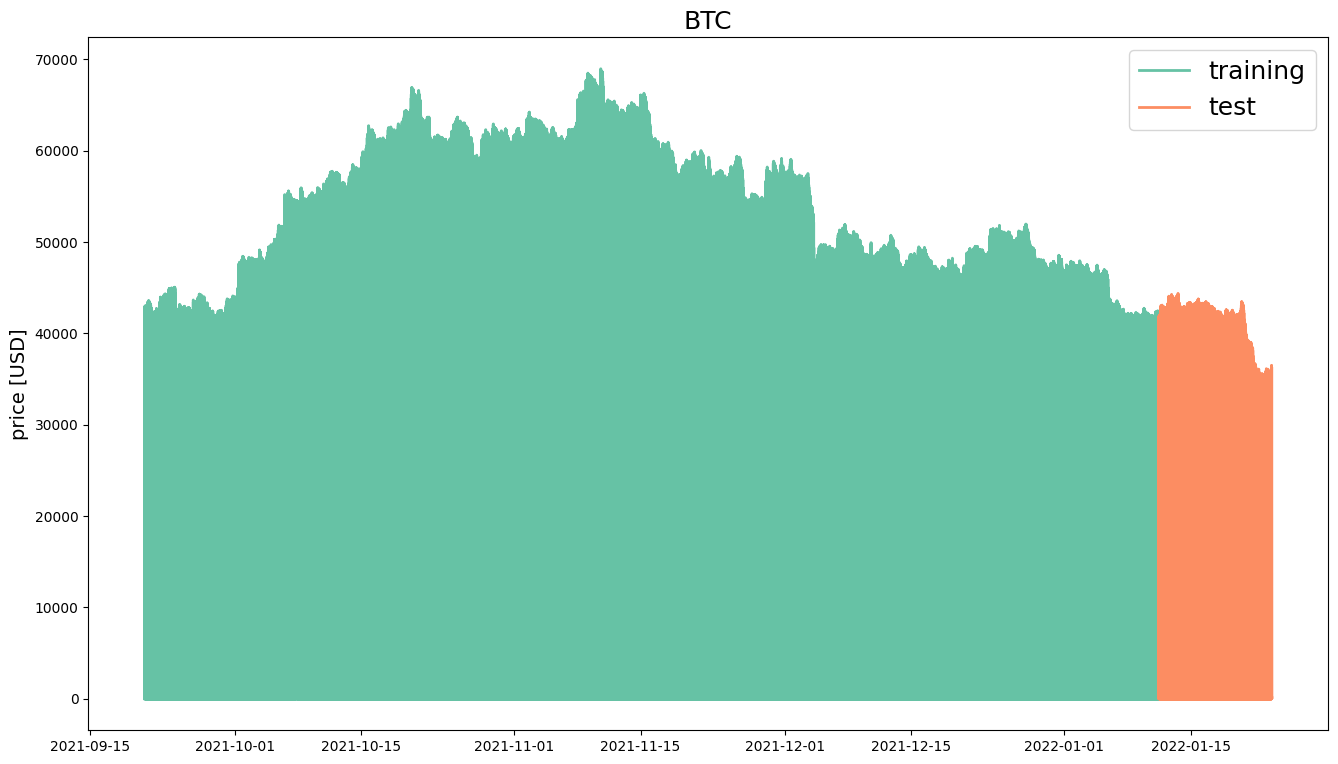

In [20]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='BTC')

## LSTM

In [21]:
def normalise_zero_base(df):
    """ Normalise dataframe column-wise to reflect changes with respect to first entry. """
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    """ Normalise dataframe column-wise min/max. """
    return (df - df.min()) / (data.max() - df.min())

In [22]:
def extract_window_data(df, window_len=10, zero_base=True):
    """ Convert dataframe to overlapping sequences/windows of len `window_data`.
    
        :param window_len: Size of window
        :param zero_base: If True, the data in each window is normalised to reflect changes
            with respect to the first entry in the window (which is then always 0)
    """
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [23]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    """ Prepare data for LSTM. """
    # train test split
    train_data, test_data = train_test_split(df, test_size=test_size)

    # extract window data
    X_train = extract_window_data(train_data, int(window_len), zero_base)
    X_test = extract_window_data(test_data, int(window_len), zero_base)
    
    # extract targets
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [24]:
def build_lstm_model(input_data, output_size, neurons=20, activ_func='linear',
                     dropout=0.25, loss='mae', optimizer='adam'):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [44]:
np.random.seed(42)

# data params
window_len = 7
test_size = 0.1
zero_base = True

# model params
lstm_neurons = 20
epochs = 70
batch_size = 64
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [45]:
df.iloc[:100000, :]

open          high         low      volumeto  \
time                                                                        
2021-09-21 00:01:00      2.079028      2.080605      2.0720  2.804627e+05   
2021-09-21 00:01:00    541.006000    541.200000    539.7000  1.889432e+02   
2021-09-21 00:01:00    363.737500    363.900000    363.0000  8.792685e+02   
2021-09-21 00:01:00  42986.143333  43001.000000  42898.0000  9.183861e+01   
2021-09-21 00:01:00      0.208326      0.208400      0.2078  1.051337e+06   
...                           ...           ...         ...           ...   
2021-09-25 23:04:00     47.300740     47.363000     47.2600  3.742126e+02   
2021-09-25 23:04:00   2928.041429   2929.960000   2924.1900  4.793536e+02   
2021-09-25 23:04:00      1.202550      1.226700      1.1789  9.678045e+02   
2021-09-25 23:04:00    151.206667    151.310000    151.0000  1.575086e+02   
2021-09-25 23:04:00   2258.294600   2258.889200   2257.7000  1.937210e-01   

                       volumefrom         close  
time                                             
2021-09-21 00:01:00      2.075869      2.076458  
2021-09-21 00:01:00    540.716930    540.722000  
2021-09-21 00:01:00    363.499554    363.654000  
2021-09-21 00:01:00  42942.976718  42947.065566  
2021-09-21 00:01:00      0.208077      0.208200  
...                           ...           ...  
2021-09-25 23:04:00     47.299371     47.298260  
2021-09-25 23:04:00   2927.517773   2926.425714  
2021-09-25 23:04:00      1.202798      1.202800  
2021-09-25 23:04:00    151.163584    151.145167  
2021-09-25 23:04:00   2258.294600   2258.294600  

[100000 rows x 6 columns]

In [46]:
train, test, X_train, X_test, y_train, y_test = prepare_data(df.iloc[:1000000, :], target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [47]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/70
14063/14063 [==============================] - 65s 4ms/step - loss: 144.7886
Epoch 2/70
14063/14063 [==============================] - 63s 4ms/step - loss: 114.2741
Epoch 3/70
14063/14063 [==============================] - 63s 5ms/step - loss: 96.5347
Epoch 4/70
14063/14063 [==============================] - 63s 4ms/step - loss: 83.7860
Epoch 5/70
14063/14063 [==============================] - 62s 4ms/step - loss: 70.1806
Epoch 6/70
14063/14063 [==============================] - 64s 5ms/step - loss: 57.0016
Epoch 7/70
14063/14063 [==============================] - 63s 5ms/step - loss: 48.8047
Epoch 8/70
14063/14063 [==============================] - 62s 4ms/step - loss: 42.7224
Epoch 9/70
14063/14063 [==============================] - 64s 5ms/step - loss: 40.4666
Epoch 10/70
14063/14063 [==============================] - 62s 4ms/step - loss: 36.1945
Epoch 11/70
14063/14063 [==============================] - 63s 5ms/step - loss: 33.9436
Epoch 12/70
14063/14063 [==============

In [49]:
model.save("lstm_crypto.h5")

## Test set Prediction & error

In [50]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()

3125/3125 [==============================] - 11s 3ms/step


In [51]:
mean_absolute_error(preds, y_test)

26.074582964929455

## Predicting Stream Data 

In [59]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')

In [60]:
hist.head()
print(hist.shape)

(2001, 8)


In [61]:
hist.drop(['conversionType', 'conversionSymbol'],axis=1,  inplace=True)
hist

high       low      open  volumefrom      volumeto     close
time                                                                        
2017-11-23   8266.55   8012.35   8234.50    68010.70  5.554651e+08   8013.41
2017-11-24   8332.94   7900.17   8013.38    72994.63  5.957104e+08   8200.80
2017-11-25   8761.98   8153.70   8203.45    84670.41  7.184837e+08   8754.69
2017-11-26   9474.62   8746.56   8754.62    85891.98  7.825000e+08   9318.42
2017-11-27   9733.61   9316.84   9318.42   106902.79  1.025176e+09   9733.20
...              ...       ...       ...         ...           ...       ...
2023-05-12  27080.81  25848.30  26992.24    42499.10  1.122718e+09  26807.89
2023-05-13  27048.87  26705.71  26807.89    12487.21  3.353195e+08  26789.55
2023-05-14  27201.48  26611.49  26789.55    11861.19  3.192155e+08  26932.09
2023-05-15  27668.25  26757.84  26932.09    27944.49  7.636423e+08  27175.06
2023-05-16  27301.71  26873.63  27175.06    19822.83  5.366476e+08  27023.22

[2001 rows x 6 columns]

In [71]:
model = keras.models.load_model('/content/drive/MyDrive/Project/BDA/lstm-crypto1.h5')
train, test, X_train, X_test, y_train, y_test = prepare_data(hist, target_col, window_len=window_len, zero_base=zero_base, test_size=0.95)

In [73]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()

60/60 [==============================] - 1s 4ms/step


In [74]:
mean_absolute_error(preds, y_test)

0.02644908540510029

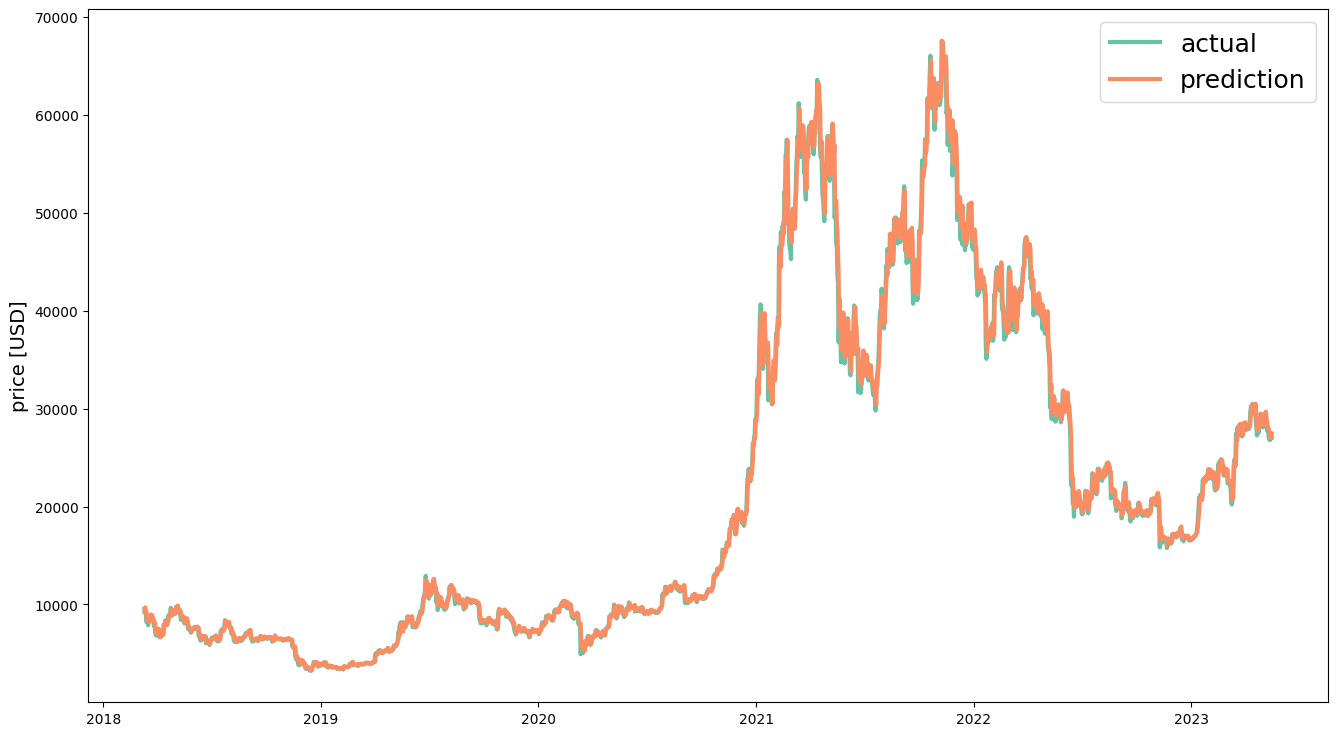

In [75]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)

line_plot(targets, preds, 'actual', 'prediction', lw=3)

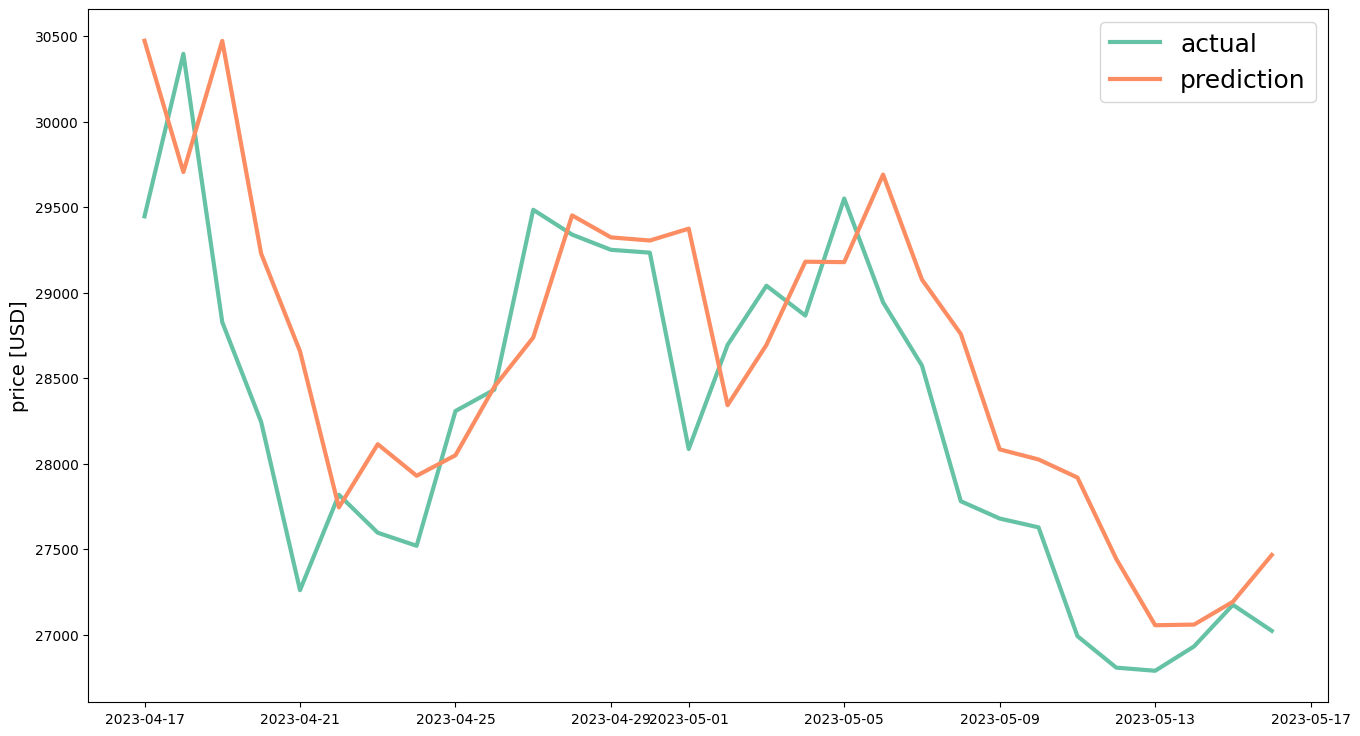

In [76]:
n_points = 30

line_plot(targets[-n_points:], preds[-n_points:], 'actual', 'prediction', lw=3)

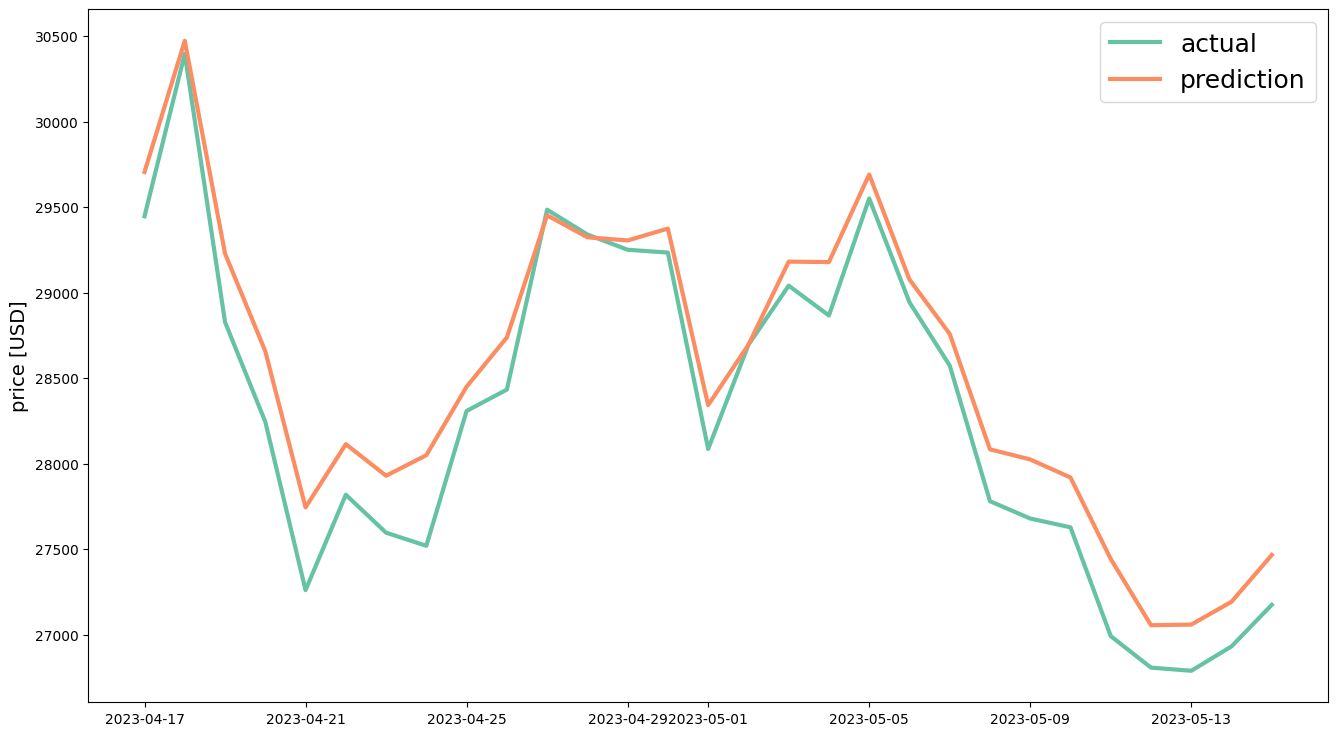

In [77]:
line_plot(targets[-n_points:][:-1], preds[-n_points:].shift(-1), 'actual', 'prediction', lw=3)

## Compare returns

In [78]:
actual_returns = targets.pct_change()[1:]
predicted_returns = preds.pct_change()[1:]

In [79]:
def dual_line_plot(line1, line2, line3, line4, label1=None, label2=None, title='', lw=2):
    import matplotlib.dates as mdates
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 9))
    ax1.plot(line1, label=label1, linewidth=lw)
    ax1.plot(line2, label=label2, linewidth=lw)
    ax2.plot(line3, label=label1, linewidth=lw)
    ax2.plot(line4, label=label2, linewidth=lw)
    ax2.set_xticks(ax1.get_xticks())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.set_ylabel('daily returns', fontsize=14)
    ax2.legend(loc='best', fontsize=18);

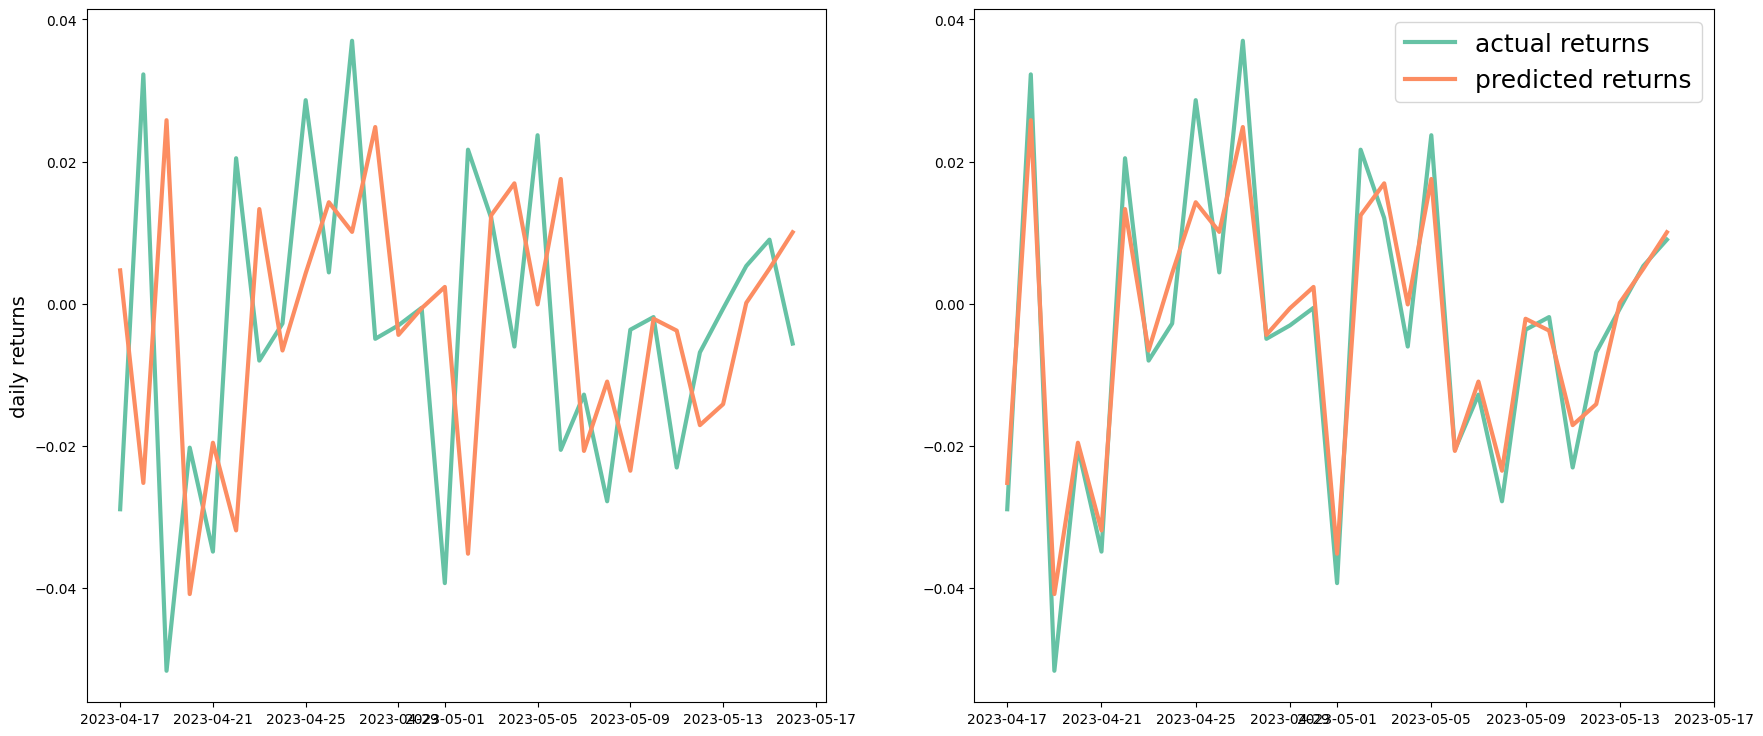

In [80]:
dual_line_plot(actual_returns[-n_points:],
          predicted_returns[-n_points:],
          actual_returns[-n_points:][:-1],
          predicted_returns[-n_points:].shift(-1),
          'actual returns', 'predicted returns', lw=3)

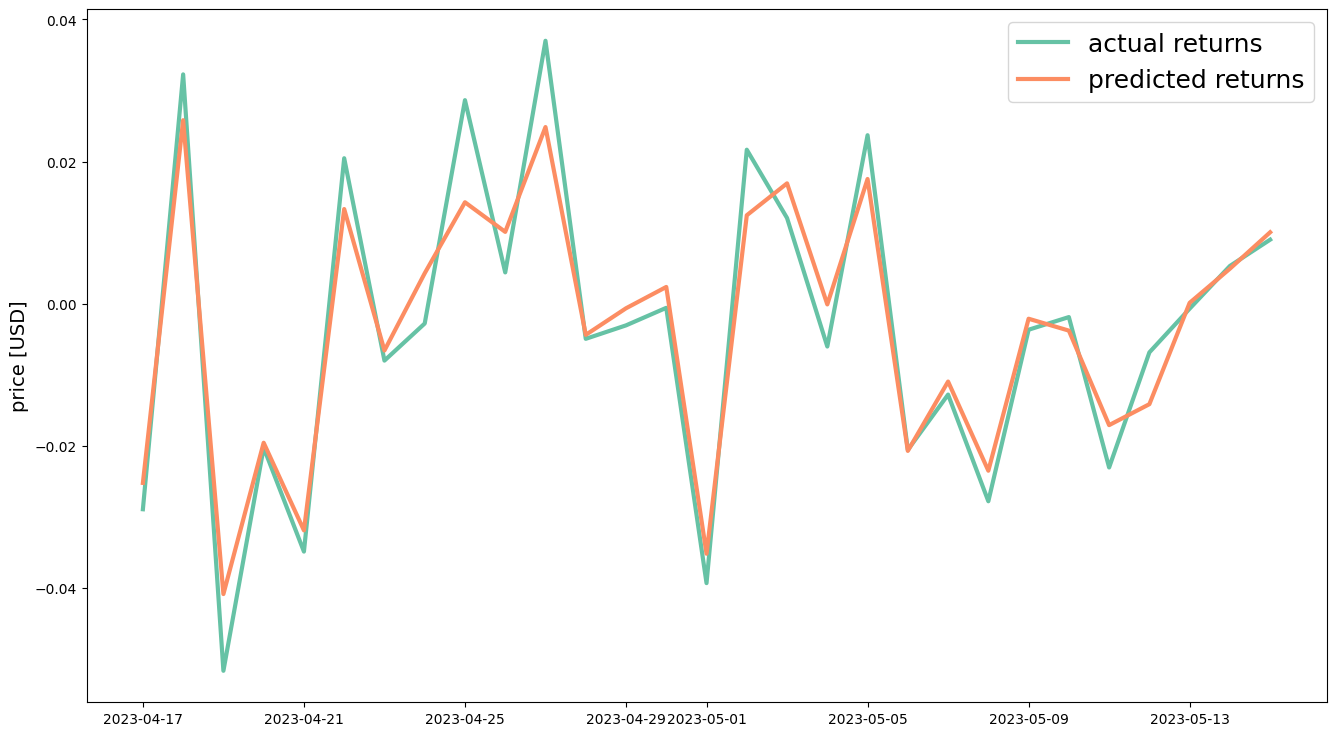

In [81]:
line_plot(actual_returns[-n_points:][:-1], predicted_returns[-n_points:].shift(-1),
           'actual returns', 'predicted returns', lw=3)